In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import re
import scipy as sp
import scipy.stats as stats
from scipy.interpolate import interp1d

import stats13tools.stats13tools as st

%matplotlib inline

In [2]:
colors = {"orange": "#f0ad4e",
          "red": "#d9534f",
          "blue": "#5bc0de",
          "green": "#5cb85c",
          "gray": "#636c72",
          "lightgray": "#d2d2d2"
         }

# Outlier

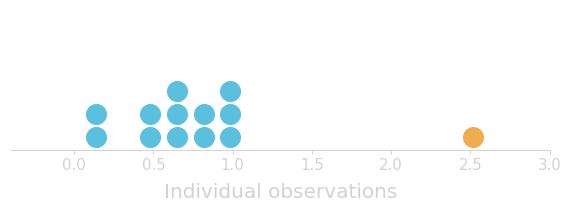

In [67]:
#data = np.append(np.random.random(12), 2.6)
data= np.array([ 0.7304202 ,  0.05219423,  0.43502886,  0.99978179,  0.49281804,
        0.76723608,  0.62827719,  0.92329442,  0.76767962,  0.15174089,
        0.91373424,  0.62770779,  2.6       ])

x, y = st.to_dotplot(data, kind="bins", scale=0.18, nbins=15)

#plot
fig,ax = plt.subplots(figsize=(8, 3))
ax.scatter(x[:-1], y[:-1], s=400, color=colors["blue"])
ax.scatter(x[-1:], y[-1:], s=400, color=colors["orange"])
ax.set_ylim(-0.1, 1)
ax.set_xlim(-0.4, 3)

#color="white"
#color="k"
color=colors["lightgray"]
ax.set_xlabel("Individual observations", size=20, color=color, labelpad=10)
ax.spines["bottom"].set_linewidth(1)
ax.spines["bottom"].set_color(color)
ax.tick_params(width=1, labelsize=15, color=color, labelcolor=color)
ax.set_yticks([])
for spine in ["top", "left", "right"]:
    ax.spines[spine].set_visible(False)
    
plt.tight_layout()
    
plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/outlier.svg", transparent=True)

# Cholera death days

In [68]:
data = pd.read_table("data-src/broad-street-deathdays.txt", names=["date", "deaths"])
data["idx"] = pd.to_datetime(data.date.apply(lambda x: x+"-1854"), format='%d-%b-%Y')
#data["date_fmt"] = data.date.apply(lambda x: x+"-1854")
data.index = data.idx


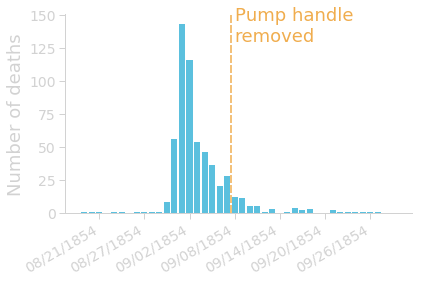

In [69]:
#color="white"
#color="k"
color=colors["lightgray"]

fig,ax = plt.subplots(figsize=(6,4))
ax.bar(np.arange(data.index.size), data.deaths, color=colors["blue"])
ax.set_ylabel("Number of deaths", size=18, color=color)
ax.set_yticks(np.arange(0, 151, 25))
ax.set_xticks(np.arange(data.index.size)[2::6])
ax.set_xticklabels(data.idx[2::6].apply(lambda x: x.strftime('%m/%d/%Y')), size=13, ha="right", rotation=30)
ax.tick_params(width=1, size=6, labelsize=14, color=color, labelcolor=color)
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)
for spine in ["left", "bottom"]:
    ax.spines[spine].set_linewidth(1)
    ax.spines[spine].set_color(color)
ax.axvline(x=19.5, ls="--", dashes=(4, 1), color=colors["orange"])
ax.text(20, 130, "Pump handle\nremoved", color=colors["orange"], size=18)


plt.tight_layout()
plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/cholera-deathdays.svg", transparent=True)

# Cholera deaths water companies

In [70]:
data = pd.DataFrame({"name": ["Southwark\n& Vauxhall", "Lambeth\nWaterworks", "Rest of\nLondon"],
                     "houses": [40046, 26107, 256423],
                     "deaths": [1263, 98, 1422]})

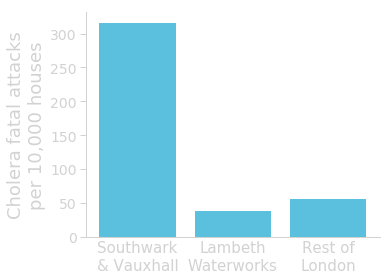

In [72]:
#color="white"
#color="k"
color=colors["lightgray"]

fig,ax = plt.subplots(figsize=(5.5,4))
ax.bar(np.arange(len(data)), (data.deaths/data.houses)*10000, color=colors["blue"])
ax.set_xticks([0, 1, 2])
#ax.set_yticks(np.arange(0, 76, 15))
ax.set_xticklabels(data.name)
ax.set_ylabel("Cholera fatal attacks\nper 10,000 houses", size=18, color=color)
ax.tick_params(axis="y", width=1, size=6, labelsize=14, color=color, labelcolor=color)
ax.tick_params(axis="x", width=0, size=0, labelsize=15, color=color, labelcolor=color)
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)
for spine in ["left", "bottom"]:
    ax.spines[spine].set_linewidth(1)
    ax.spines[spine].set_color(color)

plt.tight_layout()
plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/cholera-proportion-deaths-companies.svg", transparent=True)

# Anscombe dataset

In [8]:
anscombe = pd.DataFrame(
    {"x":  np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]),
     "y1": np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]),
     "y2": np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]),
     "y3": np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]),
     "x4": np.array([8,8,8,8,8,8,8,19,8,8,8]),
     "y4": np.array([6.58,5.76,7.71,8.84,8.47,7.04,5.25,12.50,5.56,7.91,6.89])  
    })

In [32]:
for v in anscombe.columns:
    print("{}:\n mean: {:.2f}\n variance: {:.2f}".format(v, np.mean(anscombe[v]), np.var(anscombe[v])))

x:
 mean: 9.00
 variance: 10.00
x4:
 mean: 9.00
 variance: 10.00
y1:
 mean: 7.50
 variance: 3.75
y2:
 mean: 7.50
 variance: 3.75
y3:
 mean: 7.50
 variance: 3.75
y4:
 mean: 7.50
 variance: 3.75


In [35]:
for pair in [("x", "y1"), ("x", "y2"), ("x", "y3"), ("x4", "y4")]:
    a,b = np.polyfit(anscombe[pair[0]], anscombe[pair[1]], 1)
    print("Linear regression {} vs {}:\n slope: {:.2f}\n intercept: {:.2f}".format(pair[0], pair[1], a, b))

Linear regression x vs y1:
 slope: 0.50
 intercept: 3.00
Linear regression x vs y2:
 slope: 0.50
 intercept: 3.00
Linear regression x vs y3:
 slope: 0.50
 intercept: 3.00
Linear regression x4 vs y4:
 slope: 0.50
 intercept: 3.00


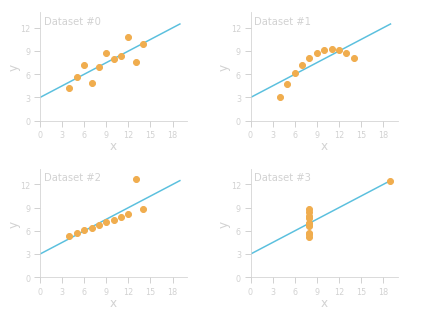

In [157]:
#color="white"
#color="k"
color=colors["lightgray"]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(6, 4.5))

#plot only regression line
for i,(ax,data) in enumerate(zip([ax1, ax2, ax3, ax4], [("x", "y1"), ("x", "y2"), ("x", "y3"), ("x4", "y4")])):
    #format axis
    ax.set_xlim(0, 20)
    ax.set_ylim(0, 14)
    ax.text(0.5, 12.5, "Dataset #{}".format(i), color=color)
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    for spine in ["left", "bottom"]:
        ax.spines[spine].set_color(color)
    ax.tick_params(width=1, size=6, labelsize=8, color=color, labelcolor=color)
    ax.set_xlabel("x", size=12, color=color, labelpad=0)
    ax.set_ylabel("y", size=12, color=color, labelpad=0)
    ax.set_xticks(np.arange(0, 20, 3))
    ax.set_yticks(np.arange(0, 14, 3))
    #linear regression
    a,b = np.polyfit(anscombe[data[0]], anscombe[data[1]], 1)
    xfit = np.arange(0, 20)
    yfit = np.polyval([a, b], xfit)
    ax.plot(xfit, yfit, color=colors["blue"])

#plot raw data in superimposed axes, to be used in svg animation
ax5 = ax1.twinx()
ax6 = ax2.twinx()
ax7 = ax3.twinx()
ax8 = ax4.twinx()
for ax,data in zip([ax5, ax6, ax7, ax8], [("x", "y1"), ("x", "y2"), ("x", "y3"), ("x4", "y4")]):
    #format same
    ax.axis('off')
    ax.set_xlim(0, 20)
    ax.set_ylim(0, 14)
    #plot data
    ax.scatter(anscombe[data[0]], anscombe[data[1]], color=colors["orange"])


plt.tight_layout()
fig.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/anscombe.svg", transparent=True)

# Bar graph distribution

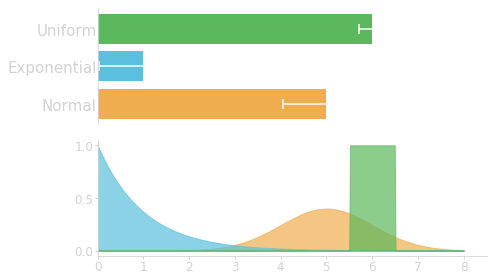

In [63]:
color=colors["lightgray"]

fig, (ax0,ax) = plt.subplots(nrows=2, figsize=(7, 4))

x = np.linspace(0, 8, 500)
#normal
norm_mu = 5
norm_sigma = 1
ynorm = stats.norm.pdf(x, norm_mu, norm_sigma)
#exponential
exp_s = 0
exp_lambda = 1
yexpon = stats.expon.pdf(x, exp_s, exp_lambda)
#uniform
uniform_min = 5.5
uniform_delta = 1 
yuniform = stats.uniform.pdf(x, uniform_min, uniform_delta)

#horizontal bar plot
ax0.barh(0, stats.norm.rvs(norm_mu, norm_sigma, size=1000).mean(),
         xerr=stats.norm.rvs(norm_mu, norm_sigma, size=1000).std(),
         error_kw={"ecolor": "w", 'lw': 1.5, 'capsize': 5, 'markeredgewidth':1.5}, color=colors["orange"])
ax0.barh(1, stats.expon.rvs(exp_s, exp_lambda, size=1000).mean(),
         xerr=stats.expon.rvs(exp_s, exp_lambda, size=1000).std(),
         error_kw={"ecolor": "w", 'lw': 1.5, 'capsize': 5, 'markeredgewidth':1.5}, color=colors["blue"])
ax0.barh(2, stats.uniform.rvs(uniform_min, uniform_delta, size=1000).mean(),
         xerr=stats.uniform.rvs(uniform_min, uniform_delta, size=1000).std(),
         error_kw={"ecolor": "w", 'lw': 1.5, 'capsize': 5, 'markeredgewidth':1.5}, color=colors["green"])

#white background to get true color even if transparent is true
ax.fill_between(x, ynorm, color="white")
ax.fill_between(x, yexpon, color="white")
ax.fill_between(x, yuniform, color="white")
#dist
ax.fill_between(x, ynorm, alpha=0.7, color=colors["orange"])
ax.fill_between(x, yexpon, alpha=0.7, color=colors["blue"])
ax.fill_between(x, yuniform, alpha=0.7, color=colors["green"])

for ax in [ax0, ax]:
    ax.set_xlim(0, 8.5)
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    for spine in ["left", "bottom"]:
        ax.spines[spine].set_color(color)
    ax.tick_params(width=1, size=3, labelsize=12, color=color, labelcolor=color, pad=1)

ax0.set_yticks(np.arange(3))
ax0.tick_params(axis="y", width=1, size=0, color=color, labelcolor=color)
ax0.set_yticklabels(["Normal", "Exponential", "Uniform"], size=15, color=color)
ax0.set_xticks([])
ax0.spines["bottom"].set_visible(False)

plt.tight_layout()
fig.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/barplot-distributions.svg", transparent=True)

# Different data, Same bar graph

In [163]:
data = pd.read_csv("data-src/barplot-same.csv")
data

,set1,set2,set3
0,21.586006,11.252015,29.322192
1,20.925902,21.600027,14.051790
2,20.595850,19.057683,14.269245
3,21.916059,22.809872,14.414553
4,11.836810,18.001636,13.989755
5,11.855878,9.374687,14.399958
6,11.783707,10.038652,14.528022
7,11.732288,17.793426,14.611573
8,11.767501,14.072002,14.412910


In [170]:
print("Mean:\n{}\n\nStandart deviation:\n{}".format(data.mean(), data.std()))

Mean:
set1    16.0
set2    16.0
set3    16.0
dtype: float64

Standart deviation:
set1    5.0
set2    5.0
set3    5.0
dtype: float64


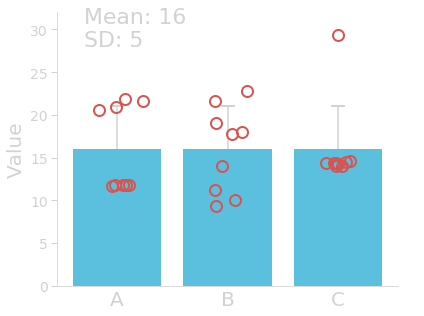

In [229]:
color=colors["lightgray"]

fig, ax1 = plt.subplots(figsize=(6,4.5))
ax2 = ax1.twinx()
ax2.axis('off')

#Bar graph
for i,dataset in enumerate(data.columns):
    ax1.errorbar(i, data[dataset].mean(), yerr=data[dataset].std(),
                capsize= 7, markeredgewidth=2, zorder=0, color=color)
    ax1.bar(i, data[dataset].mean(), width=0.8, color=colors["blue"])
ax1.text(-0.3, 28, "Mean: 16\nSD: 5", color=color, size=22)
    
for ax in [ax1]:
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    for spine in ["left", "bottom"]:
        ax.spines[spine].set_color(color)
    ax.tick_params(axis="y", width=1, size=6, labelsize=14, color=color, labelcolor=color)
    ax.tick_params(axis="x", width=1, size=0, color=color, labelcolor=color, pad=4)
    ax.set_xticks(np.arange(3))
    ax.set_xticklabels(["A", "B", "C"], size=20, color=color)
    ax.set_ylim([0, 32])
    ax.set_ylabel("Value", size=20, color=color)

for ax in [ax2]:
    ax.set_xlim(ax1.get_xlim())
    ax.set_ylim(ax1.get_ylim())
    
#Raw data
for i,dataset in enumerate(data.columns):
    ax2.plot(np.random.normal(i, 0.08, data[dataset].size), data[dataset], 'o',
            markersize=11, markerfacecolor="none", mec=colors["red"], mew=2)

plt.tight_layout()

fig.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/barplot-same.svg", transparent=True)

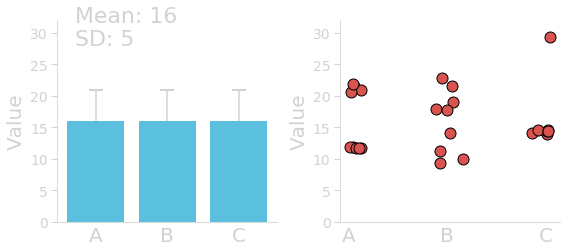

In [247]:
color=colors["lightgray"]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8,3.5))

#Bar graph
for i,dataset in enumerate(data.columns):
    ax1.errorbar(i, data[dataset].mean(), yerr=data[dataset].std(),
                capsize= 7, markeredgewidth=2, zorder=0, color=color)
    ax1.bar(i, data[dataset].mean(), width=0.8, color=colors["blue"])
ax1.text(-0.3, 28, "Mean: 16\nSD: 5", color=color, size=22)
    
for ax in [ax1, ax2]:
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    for spine in ["left", "bottom"]:
        ax.spines[spine].set_color(color)
    ax.tick_params(axis="y", width=1, size=6, labelsize=14, color=color, labelcolor=color)
    ax.tick_params(axis="x", width=1, size=0, color=color, labelcolor=color, pad=4)
    ax.set_xticks(np.arange(3))
    ax.set_xticklabels(["A", "B", "C"], size=20, color=color)
    ax.set_ylim([0, 32])
    ax.set_ylabel("Value", size=20, color=color)
    
#Raw data
for i,dataset in enumerate(data.columns):
    ax2.plot(np.random.normal(i, 0.08, data[dataset].size), data[dataset], 'o',
            markersize=11, markerfacecolor=colors["red"], mec="k", mew=1)

plt.tight_layout()

fig.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/barplot-same-side.svg", transparent=True)

# Distribution

In [9]:
#data = np.concatenate((np.random.random(15)*10,
#                       np.random.exponential(6, size=10),
#                       np.random.normal(5, 1, size=9)))

data = np.array([  0.27368417,   0.69695148,   1.22412897,   1.27979535,
         1.81621969,   1.85946145,   2.41556396,   2.76827751,
         3.02075622,   3.06727978,   3.24158875,   3.88457044,
         4.03797476,   4.20953214,   4.2563078 ,   4.34915286,
         4.45022083,   4.58637244,   4.7307943 ,   5.02632367,
         5.18286912,   5.48597446,   5.51528556,   5.88517481,
         6.00110563,   6.32739292,   6.53556098,   6.63964031,
         6.66471986,   6.77940184,   9.86018208,  10.04012766,
        13.32321601,  17.79694609])

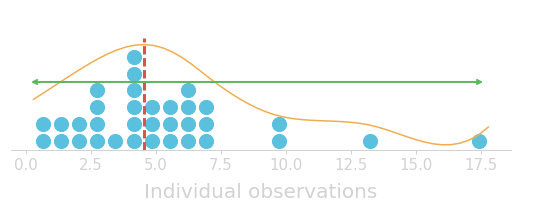

In [10]:
color=colors["lightgray"]



scale = 0.09
x, y = st.to_dotplot(data, kind="bins", scale=scale, nbins=25)

data = np.sort(data)
kde = stats.gaussian_kde(data)
density = kde(data) # estimate the local density at each datapoint
jitter = 1#np.random.rand(*data.shape) # generate some random jitter between 0 and 1
y2 = density*jitter*scale
x2 = data
f2 = interp1d(x2, y2, kind='cubic')
xnew = np.linspace(x2.min(), x2.max(), num=50, endpoint=True)

#plot
fig,ax = plt.subplots(figsize=(8, 3))
ax1 = ax.twinx()
ax2 = ax.twinx()
ax3 = ax.twinx()
ax.scatter(x, y, s=200, color=colors["blue"])
ax.set_ylim(-0.05, y.max()+0.25)

ax2.set_ylim(ax1.get_ylim())
ax3.set_ylim(ax1.get_ylim())

ax1.plot(xnew, f2(xnew), color=colors["orange"])
ax1.set_ylim(ax1.get_ylim()[0], ax1.get_ylim()[1]+0.004)
ax1.axis("off")

ax2.axvline(np.median(data), ymax=0.8, color=colors["red"], ls="--", lw=3)
ax2.axis("off")

ax3.annotate(s='', xy=(ax1.get_xlim()[1]-1,ax1.get_ylim()[1]+0.47), xytext=(0.1,ax1.get_ylim()[1]+0.47), 
             arrowprops=dict(arrowstyle='<->', color=colors["green"], linewidth=2))
ax3.axis("off")

#color="white"
#color="k"
color=colors["lightgray"]
ax.set_xlabel("Individual observations", size=20, color=color, labelpad=10)
ax.spines["bottom"].set_linewidth(1)
ax.spines["bottom"].set_color(color)
ax.tick_params(width=1, labelsize=15, color=color, labelcolor=color)
ax.set_yticks([])
for spine in ["top", "left", "right"]:
    ax.spines[spine].set_visible(False)
    
plt.tight_layout()
    
plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/dotplot-distribution.svg", transparent=True)

# Multi modal distribution

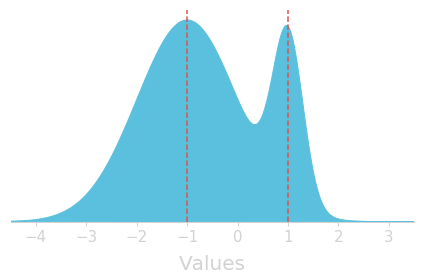

In [59]:
# The grid we'll use for plotting
x_grid = np.linspace(-4.5, 3.5, 1000)

# Draw points from a bimodal distribution in 1D
np.random.seed(0)
x = np.concatenate([norm(-1, 1.).rvs(400),
                    norm(1, 0.3).rvs(100)])
pdf_true = (0.8 * norm(-1, 1).pdf(x_grid) +
            0.2 * norm(1, 0.3).pdf(x_grid))

pdf = kde_funcs[i](x, x_grid, bandwidth=0.2)

# Plot the kernel density estimate
fig, ax = plt.subplots(figsize=(6,4))
ax.fill(x_grid, pdf_true, ec=colors["blue"], fc=colors["blue"], alpha=1)

for val in [-1, 1]:
    ax.axvline(val, ls="--", color=colors['red'])

for ax in [ax]:
    ax.set_xlabel("Values", size=20, color=colors["lightgray"], labelpad=10)
    ax.spines["bottom"].set_linewidth(1)
    ax.spines["bottom"].set_color(colors["lightgray"])
    ax.tick_params(width=1, labelsize=15, color=colors["lightgray"], labelcolor=colors["lightgray"])
    ax.set_yticks([])
    ax.set_xlim(-4.5, 3.5)
    ax.set_ylim(0)
    for spine in ["top", "left", "right"]:
        ax.spines[spine].set_visible(False)
    
plt.tight_layout()

plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/distribution-multimodal.svg", transparent=True)

# Symetrical, skewness

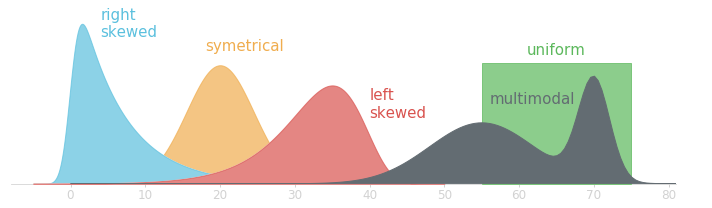

In [57]:
color=colors["lightgray"]

x = np.linspace(-5, 50, 500)

#normal
norm_mu = 20
norm_sigma = 4.5
ynorm = stats.norm.pdf(x, norm_mu, norm_sigma)

#exponorm
exponorm = stats.exponnorm(6)

#gumbel left skewed
gumbel_l = stats.gumbel_l(35, 5)

fig, ax1 = plt.subplots(figsize=(10,3))
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax4 = ax1.twinx()
ax5 = ax1.twinx()

#normal
ax1.fill_between(x, ynorm, color="w")
ax1.fill_between(x, ynorm, color=colors["orange"], alpha=0.7)
ax1.text(18, 0.1, "symetrical", size=15, color=colors["orange"])

#skewed right
ax2.fill_between(x, exponorm.pdf(x), color="w")
ax2.fill_between(x, exponorm.pdf(x), color=colors["blue"], alpha=0.7)
ax2.text(4, 0.11, "right\nskewed", size=15, color=colors["blue"])

#skewed left
ax3.fill_between(x, gumbel_l.pdf(x), color="w")
ax3.fill_between(x, gumbel_l.pdf(x), color=colors["red"], alpha=0.7)
ax3.text(40, 0.05, "left\nskewed", size=15, color=colors["red"])

#uniform
ax4.fill_between([55, 55, 75, 75], [0,0.09, 0.09, 0], color="w")
ax4.fill_between([55, 55, 75, 75], [0,0.09, 0.09, 0], color=colors["green"], alpha=0.7)
ax4.text(61, 0.097, "uniform", size=15, color=colors["green"])

#multimodal
x_grid = np.linspace(0, 500, 1000)
    # Draw points from a bimodal distribution in 1D
#np.random.seed(0)
x = np.concatenate([stats.norm(55, 7.).rvs(400),
                    stats.norm(70, 2.1).rvs(100)])
pdf_true = (0.8 * stats.norm(55, 7.).pdf(x_grid) +
            0.4 * stats.norm(70, 2.1).pdf(x_grid))
pdf = kde_funcs[i](x, x_grid, bandwidth=0.5)
ax5.fill(x_grid, pdf_true, ec=colors["gray"], fc=colors["gray"], alpha=1)
ax5.text(56, 0.06, "multimodal", size=15, color=colors["gray"])

for ax in [ax1]:
    #ax.set_xlim(0, 8.5)
    for spine in ["top", "right",  "left"]:
        ax.spines[spine].set_visible(False)
    for spine in ["bottom"]:
        ax.spines[spine].set_color(color)
    ax.tick_params(width=1, size=3, labelsize=12, color=color, labelcolor=color, pad=1)
    ax.set_yticks([])
    ax.set_ylim(0, 0.13)
    ax.set_xlim(-8, 81)

for ax in [ax2, ax3, ax4, ax5]:
    ax.axis("off")
    ax.set_ylim(ax1.get_ylim())
    
plt.tight_layout()

plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/distribution-shape.svg", transparent=True)

# Bimodal

Waiting time between eruptions and the duration of the eruption for the Old Faithful geyser in Yellowstone National Park, Wyoming, USA.

eruptions  numeric  Eruption time in mins
waiting    numeric  Waiting time to next eruption

References:

     Hardle, W. (1991) Smoothing Techniques with Implementation in S.
     New York: Springer.

     Azzalini, A. and Bowman, A. W. (1990). A look at some data on the
     Old Faithful geyser. Applied Statistics 39, 357-365.

In [22]:
data = pd.read_csv("data-src/old-faithful.csv")

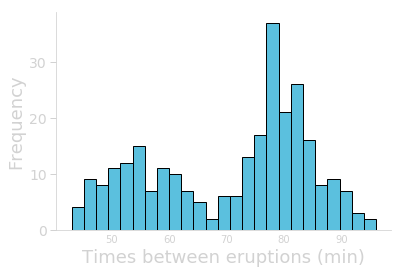

In [23]:
fig,ax = plt.subplots(figsize=(6,4))

ax.hist(data.waiting, bins=25, color=colors["blue"], edgecolor="k")

for ax in [ax]:
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    for spine in ["left", "bottom"]:
        ax.spines[spine].set_color(colors["lightgray"])
    ax.tick_params(axis="y", width=1, size=6, labelsize=14, color=colors["lightgray"], labelcolor=colors["lightgray"])
    ax.tick_params(axis="x", width=1, size=0, color=colors["lightgray"], labelcolor=colors["lightgray"], pad=4)
    #ax.set_ylim([0, 5.5])
    ax.set_ylabel("Frequency", size=18, color=colors["lightgray"])
    ax.set_xlabel("Times between eruptions (min)", size=18, color=colors["lightgray"])
    
plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/distribution-old-faithful.svg", transparent=True)

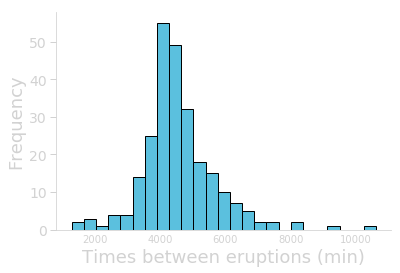

In [20]:
data = pd.read_csv("data-Lock5DataCSV/SandP500.csv")

fig,ax = plt.subplots(figsize=(6,4))

ax.hist(data.Volume, bins=25, color=colors["blue"], edgecolor="k")

for ax in [ax]:
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    for spine in ["left", "bottom"]:
        ax.spines[spine].set_color(colors["lightgray"])
    ax.tick_params(axis="y", width=1, size=6, labelsize=14, color=colors["lightgray"], labelcolor=colors["lightgray"])
    ax.tick_params(axis="x", width=1, size=0, color=colors["lightgray"], labelcolor=colors["lightgray"], pad=4)
    #ax.set_ylim([0, 5.5])
    ax.set_ylabel("Frequency", size=18, color=colors["lightgray"])
    ax.set_xlabel("Times between eruptions (min)", size=18, color=colors["lightgray"])
    
plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/distribution-sp500.svg", transparent=True)

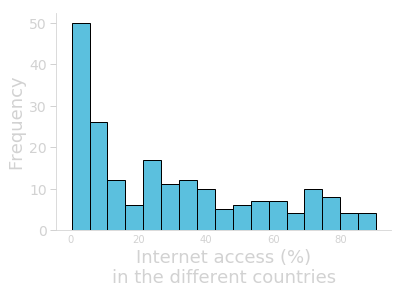

In [19]:
data = pd.read_csv("data-Lock5DataCSV/AllCountries.csv")


fig,ax = plt.subplots(figsize=(6,4))

ax.hist(data.Internet.dropna(), bins=17, color=colors["blue"], edgecolor="k")

for ax in [ax]:
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    for spine in ["left", "bottom"]:
        ax.spines[spine].set_color(colors["lightgray"])
    ax.tick_params(axis="y", width=1, size=6, labelsize=14, color=colors["lightgray"], labelcolor=colors["lightgray"])
    ax.tick_params(axis="x", width=1, size=0, color=colors["lightgray"], labelcolor=colors["lightgray"], pad=4)
    #ax.set_ylim([0, 5.5])
    ax.set_ylabel("Frequency", size=18, color=colors["lightgray"])
    ax.set_xlabel("Internet access (%)\nin the different countries", size=18, color=colors["lightgray"])
    
plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/distribution-internet-coverage.svg", transparent=True)

# Population & sample

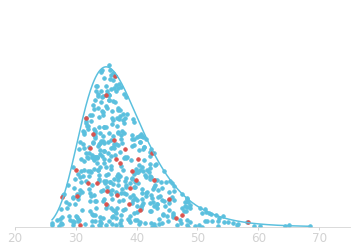

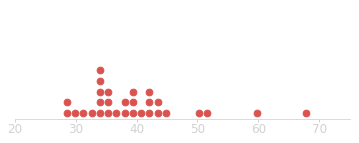

In [516]:
color=colors["lightgray"]

gumbel_r = stats.gumbel_r(35, 5)

data = gumbel_r.rvs(500)
sample_idx = np.random.randint(0, data.size+1, size=30)

x, y = st.to_dotplot(data, kind="density")
x_dist = np.linspace(x.min(), x.max(), 500)

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(x[[i for i in np.arange(data.size) if i not in sample_idx]], 
           y[[i for i in np.arange(data.size) if i not in sample_idx]], s=12, color=colors["blue"])
ax.scatter(x[sample_idx], y[sample_idx], s=12, color=colors["red"])
ax.plot(x_dist, gumbel_r.pdf(x_dist), color=colors["blue"])

for ax in [ax]:
    for spine in ["top", "right",  "left"]:
        ax.spines[spine].set_visible(False)
    for spine in ["bottom"]:
        ax.spines[spine].set_color(color)
    ax.tick_params(width=1, size=3, labelsize=12, color=color, labelcolor=color, pad=1)
    ax.set_yticks([])
    ax.set_ylim(0, 0.1)
    ax.set_xlim(20, 75)

plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/figs-gc/src-figs-gc/distribution-all.svg", transparent=True)

sample = data[sample_idx]
x_s, y_s = st.to_dotplot(sample, kind="bins", nbins=sample.size, scale=0.01, baseline=0.005)

fig1, ax1 = plt.subplots(figsize=(6,2))
ax1.scatter(x_s, y_s, s=45, color=colors["red"])

for ax in [ax1]:
    for spine in ["top", "right",  "left"]:
        ax.spines[spine].set_visible(False)
    for spine in ["bottom"]:
        ax.spines[spine].set_color(color)
    ax.tick_params(width=1, size=3, labelsize=12, color=color, labelcolor=color, pad=1)
    ax.set_yticks([])
    ax.set_ylim(0, 0.1)
    ax.set_xlim(20, 75)
    
plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/figs-gc/src-figs-gc/distribution-sample.svg", transparent=True)

# Mean Median Mode

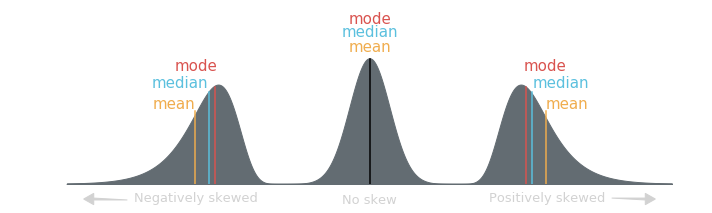

In [173]:
color=colors["lightgray"]

x = np.arange(0, 180, 0.1)

#normal
norm_mu = 90
norm_sigma = 6
ynorm = stats.norm.pdf(x, norm_mu, norm_sigma)

#gumbel left skewed
gumbel_l = stats.gumbel_l(45, 7)

#gumbel right skewed
gumbel_r = stats.gumbel_r(135, 7)

fig, ax = plt.subplots(figsize=(10,3))
ax.fill_between(x, gumbel_r.pdf(x), color=colors["gray"])
ax.fill_between(x, ynorm, color=colors["gray"])
ax.fill_between(x, gumbel_l.pdf(x), color=colors["gray"])

r1 = np.median(gumbel_r.rvs(500))
ax.axvline(r1+4, ymax=0.42, color=colors["orange"])
ax.axvline(r1, ymax=0.53, color=colors["blue"])
ax.axvline(r1-1.8, ymax=0.56, color=colors["red"])

r2 = np.median(gumbel_l.rvs(500))
ax.axvline(r2-4, ymax=0.42, color=colors["orange"])
ax.axvline(r2, ymax=0.53, color=colors["blue"])
ax.axvline(r2+1.8, ymax=0.56, color=colors["red"])

ax.axvline(90, ymax=0.72, color='k')

ax.set_ylim(0, 0.092)
ax.axis("off")

ax.text(r1+4, 0.04, "mean", size=15, color=colors["orange"], ha="left")
ax.text(r1, 0.051, "median", size=15, color=colors["blue"], ha="left")
ax.text(r1-2.5, 0.06, "mode", size=15, color=colors["red"], ha="left")

ax.text(r2-4, 0.04, "mean", size=15, color=colors["orange"], ha="right")
ax.text(r2, 0.051, "median", size=15, color=colors["blue"], ha="right")
ax.text(r2+2.5, 0.06, "mode", size=15, color=colors["red"], ha="right")

ax.text(norm_mu, 0.07, "mean", size=15, color=colors["orange"], ha="center")
ax.text(norm_mu, 0.078, "median", size=15, color=colors["blue"], ha="center")
ax.text(norm_mu, 0.085, "mode", size=15, color=colors["red"], ha="center")

ax.text(20, -0.009, "Negatively skewed", size=13, color=colors["lightgray"], ha="left")
ax.arrow(18, -0.008, -10, 0, head_width=0.006, head_length=3, fc=colors["lightgray"], ec=colors["lightgray"], clip_on=False)

ax.text(160, -0.009, "Positively skewed", size=13, color=colors["lightgray"], ha="right")
ax.arrow(162, -0.008, 10, 0, head_width=0.006, head_length=3, fc=colors["lightgray"], ec=colors["lightgray"], clip_on=False)

ax.text(norm_mu, -0.01, "No skew", size=13, color=colors["lightgray"], ha="center")


plt.tight_layout()

plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/mean-median-mode.svg", transparent=True)

# Quartiles

In [11]:
#data = np.concatenate((np.random.random(17)*10,
#                       np.random.exponential(6, size=12),
#                       np.random.normal(5, 1, size=11)))

data = np.array([  0.52863127,   0.57537212,   0.66384061,   0.76370578,
         0.76423596,   1.18361343,  2.17721224,   2.23653385,
         2.67652216,   2.934914  ,   3.13441671,   3.32536521,
         3.43340931,   3.5094689 ,   3.60363189,   4.1309275 ,
         4.25739602,   4.55784767,   4.62732083,   4.70862436,
         4.91672498,   4.93478515,   5.28192784,   5.45269164,
         5.46008335,   5.96124127,   6.38058231,   6.89634602,
         6.99411054,   7.14829662,   7.58656325,   7.68828311,
         7.78350848,   7.87048828,   7.93582328,   8.14996155,
         8.31593316,   9.23303392,   9.93138771,  15.88319831])

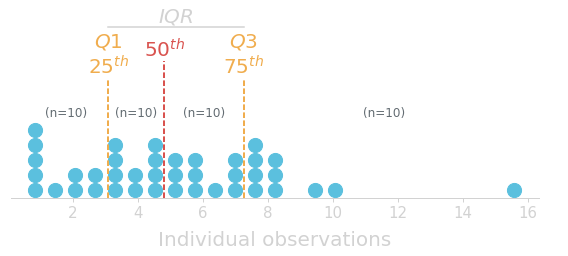

In [45]:
color=colors["lightgray"]

scale = 0.09
x, y = st.to_dotplot(data, kind="bins", scale=scale, nbins=25)

data = np.sort(data)
kde = stats.gaussian_kde(data)
density = kde(data) # estimate the local density at each datapoint
jitter = 1#np.random.rand(*data.shape) # generate some random jitter between 0 and 1
y2 = density*jitter*scale
x2 = data
f2 = sp.interpolate.interp1d(x2, y2, kind='cubic')
xnew = np.linspace(x2.min(), x2.max(), num=50, endpoint=True)

#plot
fig,ax = plt.subplots(figsize=(8, 3.5))
ax2 = ax.twinx()

ax.scatter(x, y, s=200, color=colors["blue"])
ax.set_ylim(-0.05, y.max()+0.65)

ax.axvline(np.percentile(data, 25), ymax=0.68, color=colors["orange"], ls="--", lw=2)
ax.axvline(np.percentile(data, 50), ymax=0.78, color=colors["red"], ls="--", lw=2)
ax.axvline(np.percentile(data, 75), ymax=0.68, color=colors["orange"], ls="--", lw=2)

ax.text(np.percentile(data, 25), y.max()+0.34, "$25^{th}$", ha="center", size=20, color=colors["orange"])
ax.text(np.percentile(data, 50), y.max()+0.44, "$50^{th}$", ha="center", size=20, color=colors["red"])
ax.text(np.percentile(data, 75), y.max()+0.34, "$75^{th}$", ha="center", size=20, color=colors["orange"])

ax.text(np.percentile(data, 25)/2+0.25, y.max()+0.08, "(n=10)", ha="center", size=12, color=colors["gray"])
ax.text(np.percentile(data, 25)+(np.percentile(data, 50)-np.percentile(data, 25))/2, y.max()+0.08, "(n=10)", ha="center", size=12, color=colors["gray"])
ax.text(np.percentile(data, 50)+(np.percentile(data, 75)-np.percentile(data, 50))/2, y.max()+0.08, "(n=10)", ha="center", size=12, color=colors["gray"])
ax.text(np.percentile(data, 75)+(np.percentile(data, 100)-np.percentile(data, 75))/2, y.max()+0.08, "(n=10)", ha="center", size=12, color=colors["gray"])


ax2.axis("off")
ax2.set_ylim(ax.get_ylim())
ax2.text(np.percentile(data, 25), y.max()+0.50, "$Q1$", ha="center", size=20, color=colors["orange"])
ax2.text(np.percentile(data, 75), y.max()+0.50, "$Q3$", ha="center", size=20, color=colors["orange"])
ax2.plot([np.percentile(data, 25), np.percentile(data, 75)], [0.98, 0.98], "-", color=colors["lightgray"])
ax2.text((np.percentile(data, 25)+np.percentile(data, 75))/2, y.max()+0.65, "$IQR$", ha="center", size=20, color=colors["lightgray"])

#.text(np.percentile(data, 25), y.max()+0.12, "$25^{th}$", ha="center", size=20, color=colors["orange"])
#ax.text(np.percentile(data, 75), y.max()+0.25, "$Q3$", ha="center", size=20, color=colors["orange"])



#color="white"
#color="k"
color=colors["lightgray"]
ax.set_xlabel("Individual observations", size=20, color=color, labelpad=10)
ax.spines["bottom"].set_linewidth(1)
ax.spines["bottom"].set_color(color)
ax.tick_params(width=1, labelsize=15, color=color, labelcolor=color)
ax.set_yticks([])
for spine in ["top", "left", "right"]:
    ax.spines[spine].set_visible(False)
    
plt.tight_layout()
    
plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/quartiles.svg", transparent=True)

# Histogram

In [149]:
data = np.array([36, 25, 38, 46, 55, 68, 72, 55, 36, 38, 
                 67, 45, 22, 48, 91, 46, 52, 61, 58, 55])


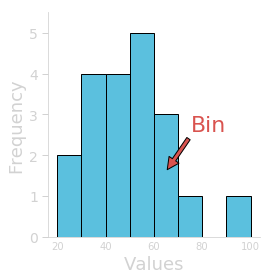

In [191]:
color=colors["lightgray"]

fig, ax1 = plt.subplots(figsize=(4,4))
ax2 = ax1.twinx()
ax2.axis('off')

ax1.hist(data, bins=8, range=[20, 100], color=colors["blue"], edgecolor="k")

for ax in [ax1]:
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    for spine in ["left", "bottom"]:
        ax.spines[spine].set_color(color)
    ax.tick_params(axis="y", width=1, size=6, labelsize=14, color=color, labelcolor=color)
    ax.tick_params(axis="x", width=1, size=0, color=color, labelcolor=color, pad=4)
    ax.set_ylim([0, 5.5])
    ax.set_ylabel("Frequency", size=18, color=color)
    ax.set_xlabel("Values", size=18, color=color)

#ax.text(160, -0.009, "Positively skewed", size=13, color=colors["lightgray"], ha="right")
#ax.arrow(75, 3.5, -8, -1, head_width=1, head_length=3, fc=colors["lightgray"], ec=colors["lightgray"], clip_on=False)

ax2.set_ylim(ax.get_ylim())
ax2.annotate('Bin',
            xy=(65, 1.6), xycoords='data', color=colors["red"], size=22,
            xytext=(90, 2.5), textcoords='data',
            arrowprops=dict(facecolor=colors["red"], shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')

plt.tight_layout()

plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/histogram-ex.svg", transparent=True)

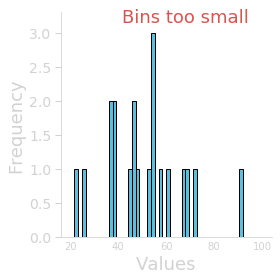

In [154]:
color=colors["lightgray"]

fig, ax = plt.subplots(figsize=(4,4))

ax.hist(data, bins=50, range=[20, 100], color=colors["blue"], edgecolor="k")

for ax in [ax]:
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    for spine in ["left", "bottom"]:
        ax.spines[spine].set_color(color)
    ax.tick_params(axis="y", width=1, size=6, labelsize=14, color=color, labelcolor=color)
    ax.tick_params(axis="x", width=1, size=0, color=color, labelcolor=color, pad=4)
    ax.set_ylim([0, 3.3])
    ax.set_ylabel("Frequency", size=18, color=color)
    ax.set_xlabel("Values", size=18, color=color)

ax.text(68, 3.15, "Bins too small", ha="center", size=18, color=colors["red"])

plt.tight_layout()

plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/histogram-ex-bins-too-small.svg", transparent=True)

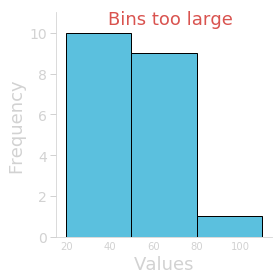

In [155]:
color=colors["lightgray"]

fig, ax = plt.subplots(figsize=(4,4))

ax.hist(data, bins=[20, 50, 80, 110], color=colors["blue"], edgecolor="k")

for ax in [ax]:
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    for spine in ["left", "bottom"]:
        ax.spines[spine].set_color(color)
    ax.tick_params(axis="y", width=1, size=6, labelsize=14, color=color, labelcolor=color)
    ax.tick_params(axis="x", width=1, size=0, color=color, labelcolor=color, pad=4)
    ax.set_ylim([0, 11])
    ax.set_ylabel("Frequency", size=18, color=color)
    ax.set_xlabel("Values", size=18, color=color)

ax.text(68, 10.4, "Bins too large", ha="center", size=18, color=colors["red"])

plt.tight_layout()

plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/histogram-ex-bins-too-large.svg", transparent=True)

# Dotplot

In [123]:
#data.Longevity

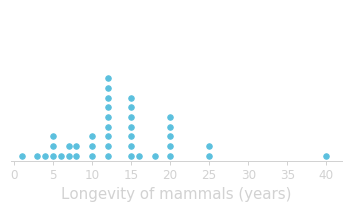

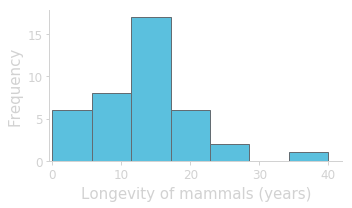

In [128]:
data=pd.read_csv("data-Lock5DataCSV/MammalLongevity.csv")

x, y = st.to_dotplot(data.Longevity.values, kind="bins", scale=0.1, nbins=np.arange(0, data.Longevity.max()+1.5)-0.5)
#plot
fig,ax = plt.subplots(figsize=(5, 3))
ax.scatter(x, y, s=30, color=colors["blue"])
ax.set_ylim(-0.05, 1.5)
ax.set_xlim(-0.4, 42)

color=colors["lightgray"]
ax.set_xlabel("Longevity of mammals (years)", size=15, color=color, labelpad=5)
ax.spines["bottom"].set_linewidth(1)
ax.spines["bottom"].set_color(color)
ax.tick_params(width=1, labelsize=12, color=color, labelcolor=color)
ax.set_yticks([])
for spine in ["top", "left", "right"]:
    ax.spines[spine].set_visible(False)
    
plt.tight_layout()
    
plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/mammals-longevity-dotplot.svg", transparent=True)

#plot
fig,ax = plt.subplots(figsize=(5, 3))
ax.hist(data.Longevity, color=colors["blue"], bins=7, range=[0, 40],
       edgecolor=colors["gray"])
#ax.set_ylim(-0.05, 1.5)
ax.set_xlim(-0.4, 42)

color=colors["lightgray"]
ax.set_xlabel("Longevity of mammals (years)", size=15, color=color, labelpad=5)
ax.set_ylabel("Frequency", size=15, color=color, labelpad=5)
ax.tick_params(width=1, labelsize=12, color=color, labelcolor=color)
for spine in ["bottom", "left"]:
    ax.spines[spine].set_linewidth(1)
    ax.spines[spine].set_color(color)
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)
    
plt.tight_layout()

plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/mammals-longevity-hist.svg", transparent=True)

# Dotplot not binned

In [173]:
data = pd.DataFrame(
        {"x": np.array([ 25.70017018,  28.19538784,  29.63238103,  30.3421627 ,
                30.71236741,  30.93938066,  32.01244413,  33.83708024,
                34.46643179,  36.00074923,  36.08213082,  36.27412034,
                36.64662294,  36.79611442,  36.86021024,  37.089032  ,
                37.26740302,  37.34977481,  37.38645913,  37.5035056 ,
                37.65093589,  38.01848268,  38.46131527,  38.52807713,
                38.65489766,  38.84825622,  38.8997979 ,  40.3232272 ,
                40.69017632,  41.37429115,  41.4577968 ,  41.62468213,
                42.70251071,  42.92195932,  43.09728221,  43.43623584,
                44.09795958,  47.63693128,  48.65426114,  51.3083199 ]),
         "y": np.array([ 0.  ,  0.  ,  0.  ,  0.01,  0.  ,  0.02,  0.  ,  0.  ,  0.01,
                0.  ,  0.01,  0.02,  0.03,  0.04,  0.01,  0.  ,  0.02,  0.05,
                0.06,  0.03,  0.07,  0.  ,  0.01,  0.02,  0.03,  0.04,  0.  ,
                0.  ,  0.01,  0.  ,  0.01,  0.02,  0.  ,  0.01,  0.02,  0.  ,
                0.01,  0.  ,  0.  ,  0.  ])
        })

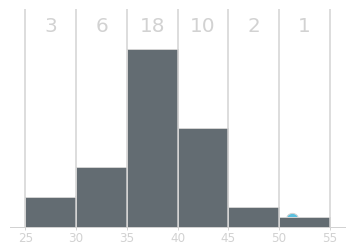

In [228]:
color=colors["lightgray"]

number,bins = np.histogram(data.x, bins=[25, 30, 35, 40, 45, 50, 55])

fig, ax1 = plt.subplots(figsize=(6,4))
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax4 = ax1.twinx()

ax1.scatter(data.x, data.y, s=150, color=colors["blue"], edgecolor=colors["lightgray"])
ax2.hist(data.x, bins=[25, 30, 35, 40, 45, 50, 55], color=colors["gray"], edgecolor=colors["lightgray"])
for lim in bins:
    ax3.axvline(lim, color=colors["lightgray"])


ax2.set_ylim(0, 22)
ax1.set_ylim(-0.004, 0.11)

#for i,n in enumerate(number):
#    ax2.text((bins[i]+bins[i+1])/2, n+0.5, "{}".format(n), ha="center", color=color, size=20)
for i,n in enumerate(number):
    ax4.text((bins[i]+bins[i+1])/2, 0.9, "{}".format(n), ha="center", color=color, size=20)



for ax in [ax1, ax2, ax3, ax4]:
    for spine in ["top", "right",  "left"]:
        ax.spines[spine].set_visible(False)
    for spine in ["bottom"]:
        ax.spines[spine].set_color(color)
    ax.tick_params(width=1, size=3, labelsize=12, color=color, labelcolor=color, pad=1)
    ax.set_yticks([])
    #ax.set_ylim(0, 22)
    #ax.set_xlim(20, 75)

plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/dotplot-histo.svg", transparent=True)




# Dotplot quantitative data

Average temperature on April 14th for the 21 years ending in 2015 is given in Table 2.20 for Des Moines, Iowa, and San Francisco, California.

In [343]:
data = pd.read_csv("data-Lock5DataCSV/April14Temps.csv")

In [344]:
#data

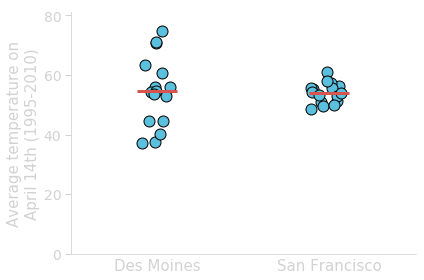

In [350]:
fig,ax = plt.subplots(figsize=(6, 4))

#Raw data
for i,dataset in enumerate(['DesMoines', 'SanFrancisco']):
    ax.plot(np.random.normal(i, 0.05, data[dataset].size), data[dataset], 'o',
            markersize=11, markerfacecolor=colors["blue"], mec="k", mew=1)
    ax.plot(i, data[dataset].median(), '_', ms=40, mew=3, color=colors["red"])
    

    
for ax in [ax]:
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    for spine in ["left", "bottom"]:
        ax.spines[spine].set_color(color)
    ax.tick_params(axis="y", width=1, size=6, labelsize=14, color=color, labelcolor=color)
    ax.tick_params(axis="x", width=1, size=0, color=color, labelcolor=color, pad=4)
    ax.set_ylim([0, 81])
    ax.set_xlim([-0.5, 1.5])
    ax.set_ylabel("Average temperature on\nApril 14th (1995-2010)", size=15, color=color)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["Des Moines", "San Francisco"], size=15)

plt.tight_layout()

plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/dotplot-data.svg", transparent=True)

# Boxplot

Over 900 movies came out of Hollywood between 2007 and 2013 and the dataset HollywoodMovies contains lots of information on these movies, such as studio, genre, budget, audience ratings, box office average opening weekend, world gross, and others.

In [3]:
data = pd.read_csv("data-Lock5DataCSV/HollywoodMovies2011.csv")

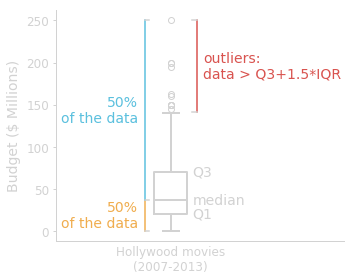

In [127]:
fig,ax = plt.subplots(figsize=(5, 4))

ax.boxplot(data.Budget.dropna(),
          boxprops = dict(linewidth=2, color=colors["lightgray"]),
          flierprops = dict(marker='o', markeredgecolor=colors["lightgray"], linestyle='none'),
          whiskerprops = dict(color=colors["lightgray"], linewidth=2),
          capprops = dict(color=colors["lightgray"], linewidth=2),
          medianprops = dict(color=colors["lightgray"], linewidth=2))

ax.set_xticks([1])
ax.set_xticklabels(["Hollywood movies\n(2007-2013)"], size=15)
ax.set_ylabel("Budget ($ Millions)", size=14, color=colors["lightgray"], labelpad=5)

for axis in [ax]:
    axis.tick_params(width=1, labelsize=12, color=color, labelcolor=colors["lightgray"])
    axis.tick_params(axis="x", width=0, length=0)
    for spine in ["bottom", "left"]:
        axis.spines[spine].set_linewidth(1)
        axis.spines[spine].set_color(color)
    for spine in ["top", "right"]:
        axis.spines[spine].set_visible(False)
    axis.set_xlim(0.47, 1.8)
        
#notations left
ax.plot([0.88, 0.88], [np.percentile(data.Budget.dropna(), 0), np.percentile(data.Budget.dropna(), 50)],
       color=colors["orange"])
ax.plot([0.88, 0.88], [np.percentile(data.Budget.dropna(), 50), np.percentile(data.Budget.dropna(), 100)],
       color=colors["blue"])
for percent in [0, 50, 100]:
    ax.plot([0.88, 0.9], [np.percentile(data.Budget.dropna(), percent), np.percentile(data.Budget.dropna(), percent)],
           color=colors["lightgray"])
ax.text(0.85, (np.percentile(data.Budget.dropna(), 0)+np.percentile(data.Budget.dropna(), 50))/2,
        "50%\nof the data", size=14, ha="right", va="center", color=colors["orange"])
ax.text(0.85, (np.percentile(data.Budget.dropna(), 50)+np.percentile(data.Budget.dropna(), 100))/2,
        "50%\nof the data", size=14, ha="right", va="center", color=colors["blue"])

#notation right
ax.plot([1.12, 1.12], [np.percentile(data.Budget.dropna(), 92), np.percentile(data.Budget.dropna(), 100)],
       color=colors["red"])
for percent in [92, 100]:
    ax.plot([1.1, 1.12], [np.percentile(data.Budget.dropna(), percent), np.percentile(data.Budget.dropna(), percent)],
           color=colors["lightgray"])
ax.text(1.15, (np.percentile(data.Budget.dropna(), 92)+np.percentile(data.Budget.dropna(), 100))/2,
        "outliers:\ndata > Q3+1.5*IQR", size=14, ha="left", va="center", color=colors["red"])
ax.text(1.1, np.percentile(data.Budget.dropna(), 75),"Q3", size=14, ha="left", va="center", color=colors["lightgray"])
ax.text(1.1, np.percentile(data.Budget.dropna(), 50),"median", size=14, ha="left", va="center", color=colors["lightgray"])
ax.text(1.1, np.percentile(data.Budget.dropna(), 25),"Q1", size=14, ha="left", va="center", color=colors["lightgray"])






plt.tight_layout()

plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/boxplot-general.svg", transparent=True)

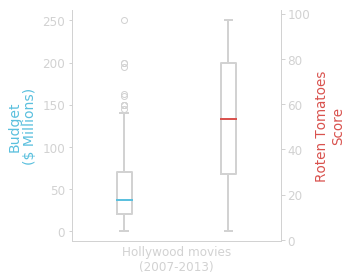

In [341]:
fig,ax = plt.subplots(figsize=(5, 4))
ax1 = ax.twinx()

ax.boxplot([data.Budget.dropna(), []],
          boxprops = dict(linewidth=2, color=colors["lightgray"]),
          flierprops = dict(marker='o', markeredgecolor=colors["lightgray"], linestyle='none'),
          whiskerprops = dict(color=colors["lightgray"], linewidth=2),
          capprops = dict(color=colors["lightgray"], linewidth=2),
          medianprops = dict(color=colors["blue"], linewidth=2))

ax1.boxplot([[], data.RottenTomatoes.dropna()],
          boxprops = dict(linewidth=2, color=colors["lightgray"]),
          flierprops = dict(marker='o', markeredgecolor=colors["lightgray"], linestyle='none'),
          whiskerprops = dict(color=colors["lightgray"], linewidth=2),
          capprops = dict(color=colors["lightgray"], linewidth=2),
          medianprops = dict(color=colors["red"], linewidth=2))


ax.set_xticks([1.5])
ax.set_xticklabels(["Hollywood movies\n(2007-2013)"], size=15)
ax.set_ylabel("Budget\n($ Millions)", size=14, color=colors["blue"], labelpad=5)

ax1.set_ylabel("Roten Tomatoes\nScore", size=13.5, color=colors["red"], labelpad=5)

for axis in [ax, ax1]:
    axis.tick_params(width=1, labelsize=12, color=color, labelcolor=colors["lightgray"])

ax.tick_params(axis="x", width=0, length=0)

for spine in ["bottom", "left"]:
    ax.spines[spine].set_linewidth(1)
    ax.spines[spine].set_color(color)
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)
    
for spine in ["bottom", "right"]:
    ax1.spines[spine].set_linewidth(1)
    ax1.spines[spine].set_color(color)
for spine in ["top", "left"]:
    ax1.spines[spine].set_visible(False)
    
plt.tight_layout()

plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/boxplot-ex.svg", transparent=True)

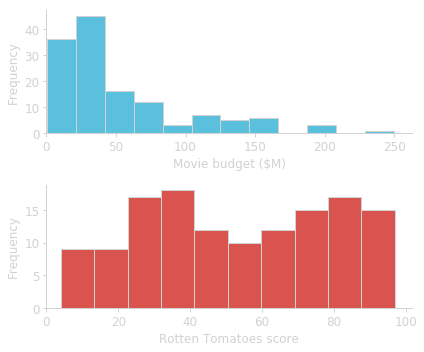

In [79]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(6, 5))
ax1.hist(data.Budget.dropna(), bins=12, color=colors["blue"], edgecolor=colors["lightgray"])
ax2.hist(data.RottenTomatoes.dropna(), bins=10, color=colors["red"], edgecolor=colors["lightgray"])

for ax in [ax1, ax2]:
    ax.tick_params(width=1, labelsize=12, color=color, labelcolor=colors["lightgray"])
    ax.set_xlim(0)
    ax.set_ylabel("Frequency", color=colors["lightgray"], size=12)
    for spine in ["bottom", "left"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(color)
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False) 
        
ax1.set_xlabel("Movie budget ($M)", color=colors["lightgray"], size=12)
ax2.set_xlabel("Rotten Tomatoes score", color=colors["lightgray"], size=12)

plt.tight_layout()

plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/boxplot-ex-distributions.svg", transparent=True)

# Coin flip simulation

### Simulation of 16 coin flips

In [71]:
n_simul = 1000

res = np.zeros(n_simul)

for i in range(n_simul):
    simul = np.random.rand(16)
    res[i] = np.sum(simul<=0.5)

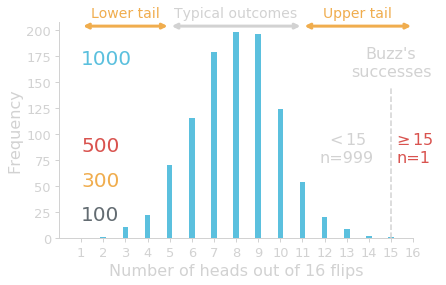

In [84]:
#fig, ax1 = plt.subplots(figsize=(6,4))
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.13, 0.20, 0.82, 0.75])
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax4 = ax1.twinx()
ax5 = ax1.twinx()
ax6 = ax1.twinx()

size_list = [100, 300, 500, 1000]
color_list = ["gray", "orange", "red", "blue"]

ax_list = [ax1, ax2, ax3, ax4]

for i in range(4):
    #x,y = st.to_dotplot(res[:size_list[i]], kind="bins", scale=1, nbins=np.arange(-0.5, 16.5, 1))
    #ax_list[i].scatter(x, y, s=10, color=colors[color_list[i]])
    ax_list[i].hist(res[:size_list[i]], bins=np.arange(-0.125, 16.2, 0.25), color=colors[color_list[i]])
    ax_list[i].text(1, size_list[i]/6, "{}".format(size_list[i]), size=20, color=colors[color_list[i]])

ax5.set_ylim(0,1)
ax5.axvline(15, ymax=0.7, color=colors["lightgray"], ls="--")
ax5.text(15, 0.75, "Buzz's\nsuccesses", size=16, color=colors["lightgray"], ha="center")
ax5.text(13, 0.35, "$<15$\nn={}".format(np.sum(res<15)), size=16, color=colors["lightgray"], ha="center")
ax5.text(16, 0.35, "$\geq15$\nn={}".format(np.sum(res>=15)), size=16, color=colors["red"], ha="center")

ax6.set_ylim(0,1)
ax6.annotate(s='', xy=(5,0.98), xytext=(11,0.98), 
             arrowprops=dict(arrowstyle='<->', color=colors["lightgray"],
                            linewidth=3))
ax6.annotate(s='', xy=(1,0.98), xytext=(5,0.98), 
             arrowprops=dict(arrowstyle='<->', color=colors["orange"],
                            linewidth=3))
ax6.annotate(s='', xy=(11,0.98), xytext=(16,0.98), 
             arrowprops=dict(arrowstyle='<->', color=colors["orange"],
                            linewidth=3))
ax6.text(8, 1.02, "Typical outcomes", size=14, ha="center", color=colors["lightgray"])
ax6.text(3, 1.02, "Lower tail", size=14, ha="center", color=colors["orange"])
ax6.text(13.5, 1.02, "Upper tail", size=14, ha="center", color=colors["orange"])


ax4.set_ylim(0)
    
for ax in [ax2, ax3, ax4, ax5, ax6]:
    ax.axis("off")

for spine in ["bottom", "left"]:
    ax1.spines[spine].set_linewidth(1)
    ax1.spines[spine].set_color(colors["lightgray"])
for spine in ["top", "right"]:
    ax1.spines[spine].set_visible(False)

for ax in [ax1]:
    ax.set_xlim(0, 16)
    ax.set_ylim(0)
    ax.set_xticks(np.arange(1, 17))
    ax.set_yticks(np.arange(0, 220, 25))
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_xlabel("Number of heads out of 16 flips", size=16, color=colors["lightgray"])
    ax.set_ylabel("Frequency", size=16, color=colors["lightgray"])

for ax in [ax1, ax2, ax3]:
    ax.set_ylim(ax4.get_ylim())
    
#plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/simulation-graph-coinflip.svg", transparent=True)

### Simulation of 28 coin flips

In [3]:
n_simul = 10000

res = np.zeros(n_simul)

for i in range(n_simul):
    simul = np.random.rand(16)
    res[i] = np.sum(simul>=0.5)

print("pvalue = {}".format(np.sum(res>=16)/n_simul))

pvalue = 0.2795


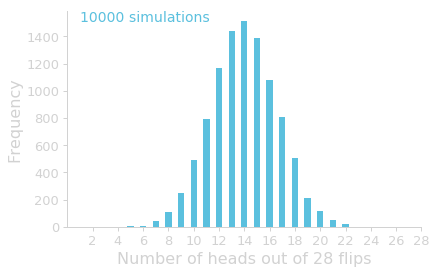

In [4]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.14, 0.20, 0.82, 0.75])

ax1.hist(res, bins=np.arange(-0.25, 28.3, 0.5), color=colors["blue"])

for spine in ["bottom", "left"]:
    ax1.spines[spine].set_linewidth(1)
    ax1.spines[spine].set_color(colors["lightgray"])
for spine in ["top", "right"]:
    ax1.spines[spine].set_visible(False)

for ax in [ax1]:
    ax.set_xlim(0, 28)
    ax.set_ylim(0)
    ax.set_xticks(np.arange(2, 29, 2))
    ax.set_xlabel("Number of heads out of 28 flips", size=16, color=colors["lightgray"])
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_ylabel("Frequency", size=16, color=colors["lightgray"])
    ax.text(1, 0.95*ax.get_ylim()[1], "10000 simulations", size=14, color=colors["blue"], ha="left")

    
#plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/simulation-graph-coinflip2.svg", transparent=True)

In [5]:
def multicolor_label(ax,list_of_strings,list_of_colors,axis='x',anchorpad=0,**kw):
    """this function creates axes labels with multiple colors
    ax specifies the axes object where the labels should be drawn
    list_of_strings is a list of all of the text items
    list_if_colors is a corresponding list of colors for the strings
    axis='x', 'y', or 'both' and specifies which label(s) should be drawn"""
    from matplotlib.offsetbox import AnchoredOffsetbox, TextArea, HPacker, VPacker

    # x-axis label
    if axis=='x' or axis=='both':
        boxes = [TextArea(text, textprops=dict(color=color, ha='left',va='bottom',**kw)) 
                    for text,color in zip(list_of_strings,list_of_colors) ]
        xbox = HPacker(children=boxes,align="center",pad=0, sep=5)
        anchored_xbox = AnchoredOffsetbox(loc=3, child=xbox, pad=anchorpad,frameon=False,bbox_to_anchor=(0.2, -0.09),
                                          bbox_transform=ax.transAxes, borderpad=0.)
        ax.add_artist(anchored_xbox)

    # y-axis label
    if axis=='y' or axis=='both':
        boxes = [TextArea(text, textprops=dict(color=color, ha='left',va='bottom',rotation=90,**kw)) 
                     for text,color in zip(list_of_strings[::-1],list_of_colors) ]
        ybox = VPacker(children=boxes,align="center", pad=0, sep=5)
        anchored_ybox = AnchoredOffsetbox(loc=3, child=ybox, pad=anchorpad, frameon=False, bbox_to_anchor=(-0.10, 0.2), 
                                          bbox_transform=ax.transAxes, borderpad=0.)
        ax.add_artist(anchored_ybox)



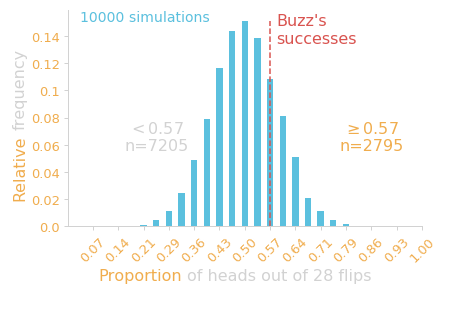

In [7]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.14, 0.20, 0.82, 0.75])
ax2 = ax1.twinx()

ax1.hist(res, bins=np.arange(-0.25, 28.3, 0.5), color=colors["blue"])

for spine in ["bottom", "left"]:
    ax1.spines[spine].set_linewidth(1)
    ax1.spines[spine].set_color(colors["lightgray"])
for spine in ["top", "right"]:
    ax1.spines[spine].set_visible(False)

for ax in [ax1]:
    ax.set_xlim(0, 28)
    ax.set_ylim(0)
    ax.set_xticks(np.arange(2, 29, 2))
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_xticklabels(["{:.2f}".format(z) for z in ax.get_xticks()/28], rotation=45, ha="center", color=colors["orange"])
    ax.set_yticklabels(ax.get_yticks()/n_simul, color=colors["orange"])
    ax.text(1, 0.95*ax.get_ylim()[1], "10000 simulations", size=14, color=colors["blue"], ha="left")

ax2.set_ylim(0,1)
ax2.axis("off")
for ax in [ax2]:
    ax.axvline(16, ymax=0.95, color=colors["red"], ls="--")
    ax.text(16.5, 0.85, "Buzz's\nsuccesses", size=16, color=colors["red"], ha="left")
    ax.text(7, 0.35, "$<{:.2f}$\nn={}".format(16/28, np.sum(res<16)), size=16, color=colors["lightgray"], ha="center")
    ax.text(24, 0.35, "$\geq{:.2f}$\nn={}".format(16/28, np.sum(res>=16)), size=16, color=colors["orange"], ha="center")


    
multicolor_label(ax1,('Proportion','of heads out of 28 flips'),(colors["orange"], colors["lightgray"]), axis='x', 
                 size=16, anchorpad=-4)
multicolor_label(ax1,('Relative','frequency'),(colors["lightgray"], colors["orange"]), axis='y', 
                 size=16, anchorpad=-2)


plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/simulation-graph-coinflip2-prop.svg", transparent=True)

In [8]:
print("pvalue = {}".format(np.sum(res>=16)/n_simul))

pvalue = 0.2795


##### Z score

In [9]:
z = ((16/28)-0.5)/np.sqrt((0.5*(1-0.5))/28)
print("z = {}".format(z))
print("pval from z = {}".format(1-stats.norm.cdf(z)))

z = 0.7559289460184542
pval from z = 0.2248458989844455


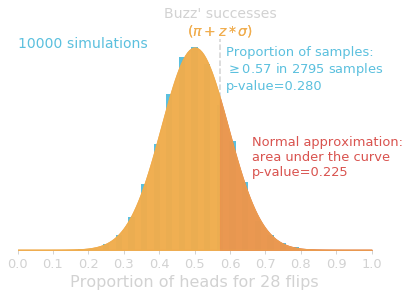

In [14]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.1, 0.15, 0.82, 0.74])
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax4 = ax1.twinx()
ax5 = ax1.twinx()
ax6 = ax1.twinx()


ax1.hist(res/28, bins=np.arange(-0.25, 28.3, 0.5)/28, normed=True, color=colors["blue"])

for spine in ["bottom"]:
    ax1.spines[spine].set_linewidth(1)
    ax1.spines[spine].set_color(colors["lightgray"])
for spine in ["top", "right", "left"]:
    ax1.spines[spine].set_visible(False)

for ax in [ax2, ax3, ax4, ax5, ax6]:
    ax.set_ylim(ax1.get_ylim())
    ax.axis("off")
    
for ax in [ax1]:
    ax.set_ylim(0)
    ax.set_xlim(0, 1)
    ax.set_yticks([])
    ax.set_xticks(np.arange(0, 1.1, 0.1))
    ax.set_xlabel("Proportion of heads for 28 flips", size=16, color=colors["lightgray"])
    ax.tick_params(axis="x", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.axvline(16/28, ymax=0.99, color=colors["lightgray"], ls="--")
    ax.text(16/28, 1.14*ax.get_ylim()[1], "Buzz' successes", size=14, color=colors["lightgray"], ha="center", va="top")
    ax.text(0, 0.95*ax.get_ylim()[1], "10000 simulations", size=14, color=colors["blue"], ha="left")
    
#normal
norm_mu = 0.5
norm_sigma = np.sqrt((norm_mu*(1-norm_mu))/28)
lim = norm_mu + (((16/28)-norm_mu)/norm_sigma)*norm_sigma #mean+0.77*SD
x1 = np.linspace(0,lim,100)
x2 = np.linspace(lim,1,100)
ynorm1 = stats.norm.pdf(x1, norm_mu, norm_sigma)
ynorm2 = stats.norm.pdf(x2, norm_mu, norm_sigma)
#normal
ax5.fill_between(x1, ynorm1*2, color=colors["orange"], alpha=0.7, zorder=100)
ax5.fill_between(x2, ynorm2*2, color=colors["red"], alpha=0.8, zorder=100)
ax5.text(16/28, 1.14*ax.get_ylim()[1], "\n($\pi+z*\sigma$)", size=14, color=colors["orange"], ha="center", va="top")

ax4.fill_between(np.concatenate([x1, x2]), np.concatenate([ynorm1, ynorm2])*2, color=colors["orange"], alpha=0.7, zorder=100)

ax2.text(18.5/28, 0.35*ax.get_ylim()[1], "Normal approximation:\narea under the curve\np-value={:.3f}".format(1-stats.norm.cdf(z)), size=13, color=colors["red"], ha="left")
ax3.text(16.5/28, 0.75*ax.get_ylim()[1], "Proportion of samples:\n$\geq{:.2f}$ in {} samples\np-value={:.3f}".format(16/28, np.sum(res>=16), np.sum(res>=16)/n_simul), size=13, color=colors["blue"], ha="left")

ax6.fill_between(np.concatenate([x1, x2]), np.concatenate([ynorm1, ynorm2])*2, color=colors["orange"], alpha=0.7, zorder=100)
ax6.text(16/28, 1.14*ax.get_ylim()[1], "\n($\pi+z*\sigma$)", size=14, color=colors["orange"], ha="center", va="top")

    
#plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/simulation-graph-coinflip-zscore.svg", transparent=True)

In [11]:
print("Exact binomial:\np-value = {}".format(np.sum(stats.binom.pmf(range(29), 28, 0.5)[16:])))

Exact binomial:
p-value = 0.285794094204904


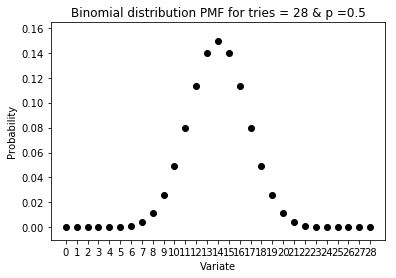

In [3]:
def binom_pmf(n=28, p=0.5):
    # There are n+1 possible number of "successes": 0 to n.
    x = range(n+1)
    y = stats.binom.pmf(x, n, p)
    plt.plot(x,y,"o", color="black")

    # Format x-axis and y-axis.
    plt.axis([-(max(x)-min(x))*0.05, max(x)*1.05, -0.01, max(y)*1.10])
    plt.xticks(x)
    plt.title("Binomial distribution PMF for tries = {0} & p ={1}".format(
            n,p))
    plt.xlabel("Variate")
    plt.ylabel("Probability")

    #plt.draw()
    
binom_pmf()

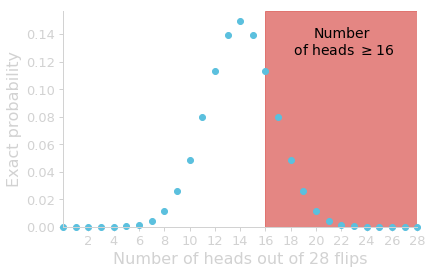

In [125]:
n = 28
p = 0.5
x = range(n+1)
y = stats.binom.pmf(x, n, p)

fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.14, 0.20, 0.82, 0.75])

ax1.plot(x, y, "o", color=colors["blue"], clip_on=False)

for spine in ["bottom", "left"]:
    ax1.spines[spine].set_linewidth(1)
    ax1.spines[spine].set_color(colors["lightgray"])
for spine in ["top", "right"]:
    ax1.spines[spine].set_visible(False)

for ax in [ax1]:
    ax.set_xlim(0, 28)
    ax.set_ylim(0)
    ax.set_xticks(np.arange(2, 29, 2))
    ax.set_xlabel("Number of heads out of 28 flips", size=16, color=colors["lightgray"])
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_ylabel("Exact probability", size=16, color=colors["lightgray"])
    ax.axvspan(16, 28, color=colors["red"], alpha=0.7)
    ax.text(22, 0.125, "Number\n of heads $\geq16$", size=14, ha="center", color="k")
    
plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/figs-gc/src-figs-gc/binomial-coinflip.pdf", transparent=True)

# Long run probability

In [102]:
flips = np.random.randint(low=0, high=2, size=10000)

In [103]:
prop_flips = [np.sum(flips[:i]/len(flips[:i])) for i in range(len(flips))]

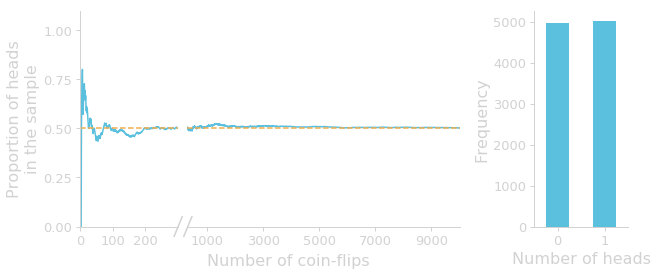

In [111]:
i1 = 300

fig = plt.figure(figsize=(9,4))
ax2 = fig.add_axes([0.285, 0.20, 0.42, 0.75])
ax1 = fig.add_axes([0.12, 0.20, 0.15, 0.75])
ax3 = fig.add_axes([0.82, 0.20, 0.145, 0.75])


ax1.plot(np.arange(0, i1)+1, prop_flips[:i1], color=colors["blue"], clip_on=True)
ax2.plot(np.arange(i1, len(prop_flips))+1, prop_flips[i1:], color=colors["blue"], clip_on=True)
ax3.hist(flips, bins=[-0.25, 0.25, 0.75, 1.25], color=colors["blue"])

for ax in [ax1, ax2]:
    ax.set_ylim(0, 1.1)
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.axhline(0.5, ls="--", color=colors["orange"])

for ax in [ax2]:
    ax.set_yticks([])
    ax.set_ylim(0)
    ax.set_xlim(i1+1, len(prop_flips)+1)
    for spine in ["left"]:
        ax.spines[spine].set_visible(False)
    for spine in ["bottom"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    ax.tick_params(axis="x", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.text(1000, -0.2, "Number of coin-flips", size=16, color=colors["lightgray"])
    ax.set_xticks(np.arange(1000, 10000, 2000))

for ax in [ax1, ax3]:
    for spine in ["bottom", "left"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])

for ax in [ax1]:
    ax.set_ylim(0)
    ax.set_xlim(1, i1+1)
    ax.set_xticks(np.arange(0, i1, 100))
    ax.set_yticks(np.arange(0, 1.1, 0.25))
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_ylabel("Proportion of heads\nin the sample", size=16, color=colors["lightgray"])
    ax.plot([i1-10, i1+15], [-0.05, 0.05], clip_on=False, color=colors["lightgray"])
    ax.plot([i1+20, i1+45], [-0.05, 0.05], clip_on=False, color=colors["lightgray"])

for ax in [ax3]:
    #ax.set_ylim(0, 1.1)
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylabel("Frequency", size=16, color=colors["lightgray"])
    ax.set_xlabel("Number of heads", size=16, color=colors["lightgray"])
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    

plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/simulation-long-run-coinflip.svg", transparent=True)

# Two tailed vs one tail tests

In [3]:
n_simul = 10000

res = np.zeros(n_simul)

for i in range(n_simul):
    simul = np.random.rand(28)
    res[i] = np.sum(simul>=0.5)

successes = 20

In [4]:
z = ((successes/28)-0.5)/np.sqrt((0.5*(1-0.5))/28)
print("z = {}".format(z))
print("pval from z = {}".format(1-stats.norm.cdf(z)))

z = 2.267786838055364
pval from z = 0.011671101006445417


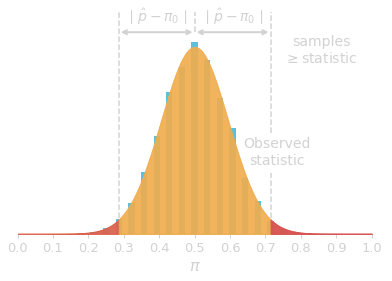

In [12]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.1, 0.15, 0.82, 0.7])
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax4 = ax1.twinx()


ax1.hist(res/28, bins=np.arange(-0.25, 28.3, 0.5)/28, normed=True, color=colors["blue"])

for spine in ["bottom"]:
    ax1.spines[spine].set_linewidth(1)
    ax1.spines[spine].set_color(colors["lightgray"])
for spine in ["top", "right", "left"]:
    ax1.spines[spine].set_visible(False)

for ax in [ax1]:
    ax.set_ylim(0)
    ax.set_xlim(0, 1)
    ax.set_yticks([])
    ax.set_xticks(np.arange(0, 1.1, 0.1))
    ax.set_xlabel("$\pi$", size=16, color=colors["lightgray"])
    ax.tick_params(axis="x", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    #observed result (upper tail)
    ax.axvline(successes/28, ymax=0.3, color=colors["lightgray"], ls="--")
    ax.text((successes+0.5)/28, 0.345*ax.get_ylim()[1], "Observed\nstatistic", size=14, color=colors["lightgray"], ha="center")
    ax.axvline(successes/28, ymin=0.5, ymax=1.1, color=colors["lightgray"], ls="--", clip_on=False)

for ax in [ax2, ax3, ax4]:
    ax.set_ylim(ax1.get_ylim())
    ax.axis("off")
    
for ax in [ax3]:
    #center of distribution
    ax.axvline(0.5, ymin=1, ymax=1.1, color=colors["lightgray"], ls="--", clip_on=False)
    #annotations
    ax.text((0.5+successes/28)/2, 1.05*ax.get_ylim()[1], "$\mid\hat{p}-\pi_0\mid$", size=14, color=colors["lightgray"], ha="center")
    ax.annotate(s='', xy=(0.5,1*ax.get_ylim()[1]), xytext=(successes/28,1*ax.get_ylim()[1]), 
             arrowprops=dict(arrowstyle='<->', color=colors["lightgray"],
                            linewidth=2))
    #lower tail
    ax.axvline(1-(successes/28), ymin=0, ymax=1.1, color=colors["lightgray"], ls="--", clip_on=False)
    ax.text((0.5+(1-(successes/28)))/2, 1.05*ax.get_ylim()[1], "$\mid\hat{p}-\pi_0\mid$", size=14, color=colors["lightgray"], ha="center")
    ax.annotate(s='', xy=(1-(successes/28),1*ax.get_ylim()[1]), xytext=(0.5,1*ax.get_ylim()[1]), 
             arrowprops=dict(arrowstyle='<->', color=colors["lightgray"],
                            linewidth=2))

for ax in [ax4]:
    ax.text((1+successes/28)/2, 0.85*ax.get_ylim()[1], "samples\n$\geq$statistic", size=14, color=colors["lightgray"], ha="center")

#normal
norm_mu = 0.5
norm_sigma = np.sqrt((norm_mu*(1-norm_mu))/28)
lim_down = norm_mu - (((successes/28)-norm_mu)/norm_sigma)*norm_sigma
lim_up = norm_mu + (((successes/28)-norm_mu)/norm_sigma)*norm_sigma
x0 = np.linspace(0,lim_down,100)
x1 = np.linspace(lim_down,lim_up,100)
x2 = np.linspace(lim_up,1,100)
ynorm0 = stats.norm.pdf(x0, norm_mu, norm_sigma)
ynorm1 = stats.norm.pdf(x1, norm_mu, norm_sigma)
ynorm2 = stats.norm.pdf(x2, norm_mu, norm_sigma)

#normal
ax2.fill_between(np.concatenate([x0, x1]), np.concatenate([ynorm0,ynorm1])*2, color=colors["orange"], alpha=0.7, zorder=100)
ax2.fill_between(x2, ynorm2*2, color=colors["red"], alpha=0.8, zorder=100)

ax3.fill_between(x0, ynorm0*2, color=colors["red"], alpha=0.8, zorder=100)
ax3.fill_between(x1, ynorm1*2, color=colors["orange"], alpha=0.7, zorder=100)
ax3.fill_between(x2, ynorm2*2, color=colors["red"], alpha=0.8, zorder=100)


plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/simulation-graph-two-tails.svg", transparent=True)

# Steve - pie chart

In [33]:
data = [["RIM (39%)", "Other (21.2%)", "Apple (19.5%)", "Palm (9.8%)", "Motorola (7.4%)", "Nokia (3.1%)"],
       [39., 21.2, 19.5, 9.8, 7.4, 3.1]]

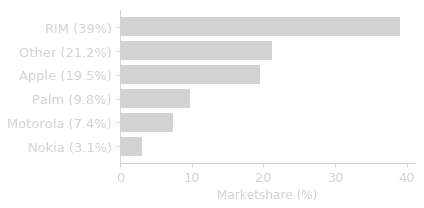

In [46]:
fig,ax = plt.subplots(figsize=(6, 3))
ax.barh(range(6), data[1][::-1], color=colors["lightgray"])
ax.set_yticks(range(6))
ax.set_yticklabels(data[0][::-1], color=colors["lightgray"], size=12)

for spine in ["bottom", "left"]:
    ax.spines[spine].set_linewidth(1)
    ax.spines[spine].set_color(colors["lightgray"])
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)

for ax in [ax]:
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_xlabel("Marketshare (%)", size=12, color=colors["lightgray"])

plt.tight_layout()

plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/steve-bar-chart.svg", transparent=True)

# UCLA - USC rivalry

## Football

In [10]:
# data from https://en.wikipedia.org/wiki/UCLA–USC_rivalry#Football_series_record
football = pd.read_csv("data-src/ucla-usc-football-rivalry.csv")

In [25]:
n_games = football.Winner.count()
n_usc = football.Winner[football.Winner=="USC"].count()
n_ucla = football.Winner[football.Winner=="UCLA"].count()
n_tie = football.Winner[football.Winner=="TIE"].count()


In [20]:
n_ucla, n_usc, n_tie

(31, 48, 7)

In [21]:
res = np.zeros(10000)
for i in range(10000):
    sample = np.random.rand(n_games)
    res[i] = np.sum(sample<0.5)

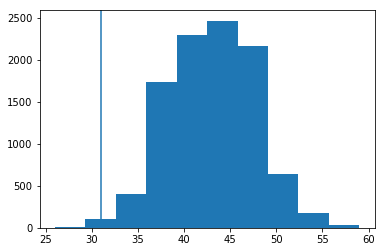

In [26]:
plt.hist(res)
plt.axvline(n_ucla)

## Basketball

In [3]:
# data from https://en.wikipedia.org/wiki/UCLA_Bruins_men%27s_basketball#Record_vs._Pac-12_opponents
basketball = pd.read_csv("data-src/ucla-usc-basketball-rivalry.csv")
basketball

,Opponent,Wins,Losses,Pct.,Streak
0,Arizona,55,43,0.561,Arizona 1
1,Arizona St.,68,19,0.782,UCLA 4
2,Cal,137,103,0.571,UCLA 1
3,Colorado,11,2,0.846,UCLA 3
4,Oregon,87,35,0.713,UCLA 1
5,Oregon St.,95,37,0.720,UCLA 2
6,Stanford,144,93,0.608,UCLA 2
7,USC,140,109,0.562,UCLA 1
8,Utah,9,7,0.562,UCLA 1
9,Washington,98,42,0.700,UCLA 7


In [4]:
ucla_usc = basketball[basketball.Opponent=="USC"]

ucla_wins = ucla_usc.Wins.values[0]
usc_wins = ucla_usc.Losses.values[0]

n_games = ucla_wins + usc_wins

phat = ucla_wins/n_games
phat

0.56224899598393574

In [6]:
n_simul = 10000

res = np.zeros(n_simul)

for i in range(n_simul):
    sample = np.random.rand(n_games)
    res[i] = np.sum(sample<0.5)/n_games

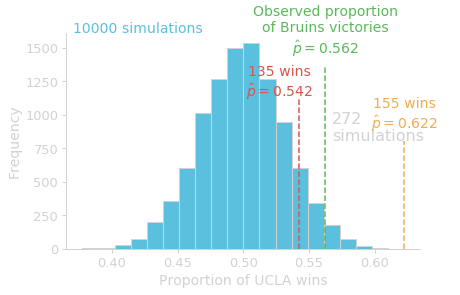

In [7]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.14, 0.15, 0.82, 0.75])
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax4 = ax1.twinx()
ax5 = ax1.twinx()

ax1.hist(res, bins=20, edgecolor=colors["lightgray"], color=colors["blue"])

for spine in ["bottom", "left"]:
    ax1.spines[spine].set_linewidth(1)
    ax1.spines[spine].set_color(colors["lightgray"])
for spine in ["top", "right"]:
    ax1.spines[spine].set_visible(False)

for ax in [ax1]:
    ax.set_ylim(0)
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_xlabel("Proportion of UCLA wins", size=14, color=colors["lightgray"])
    ax.set_ylabel("Frequency", size=14, color=colors["lightgray"])
    ax.text(ax.get_xlim()[0]+0.005, ax.get_ylim()[1], "10000 simulations", size=14, color=colors["blue"], ha="left")

for ax in [ax2, ax3, ax4, ax5]:
    ax.set_ylim(ax1.get_ylim())
    ax.axis("off")

for ax in [ax2]:
    ax.axvline(phat, ymax=0.85, color=colors["green"], ls="--")
    ax.text(phat, ax2.get_ylim()[1]*0.9, "Observed proportion\nof Bruins victories\n$\hat{p}=0.562$", size=14, color=colors["green"], ha="center")
    
for ax in [ax3]:
    ax.text(phat+0.005, ax2.get_ylim()[1]*0.5, "{}\nsimulations".format(np.sum(res>=phat)), size=16, color=colors["lightgray"], ha="left")

for ax in [ax4]:
    up = 155/249.
    ax.axvline(up, ymax=0.5, color=colors["orange"], ls="--")
    ax.text(up, ax2.get_ylim()[1]*0.55, "155 wins\n$\hat{{p}}=${:.3f}".format(up), size=14, color=colors["orange"], ha="center")


for ax in [ax5]:
    down = 135/249.
    ax.axvline(down, ymax=0.7, color=colors["red"], ls="--")
    ax.text(down-0.015, ax2.get_ylim()[1]*0.7, "135 wins\n$\hat{{p}}=${:.3f}".format(down), size=14, color=colors["red"], ha="center")

plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/ucla-usc-simulation-hist.svg", transparent=True)

In [8]:
pvalue = np.sum(res>=phat)/n_simul
np.sum(res>=phat), pvalue

(272, 0.027199999999999998)

In [9]:
np.sum(res>=155/249.), np.sum(res>=135/249.)

(1, 981)

In [10]:
n_games1 = 124
n_games2 = 498

res1 = np.zeros(n_simul)
res2 = np.zeros(n_simul)

for i in range(n_simul):
    sample1 = np.random.rand(n_games1)
    sample2 = np.random.rand(n_games2)
    res1[i] = np.sum(sample1<0.5)/n_games1
    res2[i] = np.sum(sample2<0.5)/n_games2

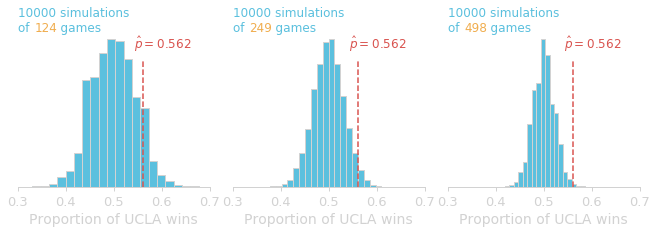

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(9, 3))

ax1.hist(res1, bins=20, edgecolor=colors["lightgray"], color=colors["blue"])
ax2.hist(res, bins=20, edgecolor=colors["lightgray"], color=colors["blue"])
ax3.hist(res2, bins=20, edgecolor=colors["lightgray"], color=colors["blue"])

for ax,games in zip([ax1, ax2, ax3], [n_games1, n_games, n_games2]):
    ax.axvline(phat, ymax=0.82, color=colors["red"], ls="--")
    ax.text(phat-0.02, ax.get_ylim()[1]*0.9, "$\hat{p}=0.562$", size=12, color=colors["red"], ha="left")
    for spine in ["bottom"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right", "left"]:
        ax.spines[spine].set_visible(False)
    ax.set_yticks([])
    ax.tick_params(axis="x", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_xlabel("Proportion of UCLA wins", size=14, color=colors["lightgray"])
    ax.set_xlim(0.3, 0.7)
    ax.set_xticks([0.3, 0.4, 0.5, 0.6, 0.7])
    ax.text(ax.get_xlim()[0], ax.get_ylim()[1], "10000 simulations\nof        games", size=12, color=colors["blue"], ha="left")
    ax.text(ax.get_xlim()[0]+0.035, ax.get_ylim()[1], "{}".format(games), size=12, color=colors["orange"], ha="left")


#plt.tight_layout()
plt.subplots_adjust(left=0.02, bottom=0.17, right=0.98, top=0.89,
                wspace=0.12, hspace=None)

plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/ucla-usc-simulation-sample-size.svg", transparent=True)

Two sided test

In [12]:
delta = phat-0.5
np.sum(res>=0.5+delta), np.sum(res<=0.5-delta), (np.sum(res>=0.5+delta)+np.sum(res<=0.5-delta))/10000

(272, 304, 0.057599999999999998)

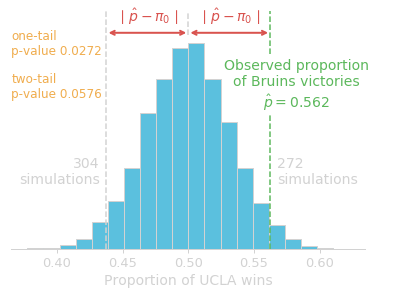

In [13]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.14, 0.15, 0.82, 0.75])
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax4 = ax1.twinx()
ax5 = ax1.twinx()

ax1.hist(res, bins=20, edgecolor=colors["lightgray"], color=colors["blue"])

for spine in ["bottom"]:
    ax1.spines[spine].set_linewidth(1)
    ax1.spines[spine].set_color(colors["lightgray"])
for spine in ["top", "right", "left"]:
    ax1.spines[spine].set_visible(False)

for ax in [ax1]:
    ax.set_yticks([])
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_xlabel("Proportion of UCLA wins", size=14, color=colors["lightgray"])

for ax in [ax2, ax3, ax4, ax5]:
    ax.set_ylim(ax1.get_ylim())
    ax.axis("off")

for ax in [ax2]:
    ax.axvline(phat, ymax=0.63, color=colors["green"], ls="--")
    ax.text(phat+0.02, ax.get_ylim()[1]*0.65, "Observed proportion\nof Bruins victories\n$\hat{p}=0.562$", size=14, color=colors["green"], ha="center")
    ax.text(phat+0.005, ax.get_ylim()[1]*0.3, "{}\nsimulations".format(np.sum(res>=phat)), size=14, color=colors["lightgray"], ha="left")
    ax.text(ax.get_xlim()[0], ax.get_ylim()[1]*0.9, "one-tail\np-value {}".format(np.sum(res>=phat)/n_simul), size=12, color=colors["orange"], ha="left")

for ax in [ax3]:
    ax.axvline(phat, ymin=0.90, ymax=1.1, color=colors["green"], ls="--", clip_on=False)
    #center of distribution
    ax.axvline(0.5, ymin=0.99, ymax=1.1, color=colors["lightgray"], ls="--", clip_on=False)
    #annotations
    ax.text((0.5+phat)/2, 1.05*ax.get_ylim()[1], "$\mid\hat{p}-\pi_0\mid$", size=14, color=colors["red"], ha="center")
    ax.annotate(s='', xy=(0.5,1*ax.get_ylim()[1]), xytext=(phat,1*ax.get_ylim()[1]), 
             arrowprops=dict(arrowstyle='<->', color=colors["red"],
                            linewidth=2))
for ax in [ax4]:
    #lower tail
    ax.axvline(1-(phat), ymin=0, ymax=1.1, color=colors["lightgray"], ls="--", clip_on=False)
    ax.text((0.5+(1-(phat)))/2, 1.05*ax.get_ylim()[1], "$\mid\hat{p}-\pi_0\mid$", size=14, color=colors["red"], ha="center")
    ax.annotate(s='', xy=(1-phat,1*ax.get_ylim()[1]), xytext=(0.5,1*ax.get_ylim()[1]), 
             arrowprops=dict(arrowstyle='<->', color=colors["red"],
                            linewidth=2))

for ax in [ax5]:
    ax.text(1-phat-0.005, ax.get_ylim()[1]*0.3, "{}\nsimulations".format(np.sum(res<=(1-phat))), size=14, color=colors["lightgray"], ha="right")
    ax.text(ax.get_xlim()[0], ax.get_ylim()[1]*0.7, "two-tail\np-value {}".format((np.sum(res<=(1-phat))+np.sum(res>=phat))/n_simul), size=12, color=colors["orange"], ha="left")

plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/ucla-usc-simulation-two-tailed.svg", transparent=True)

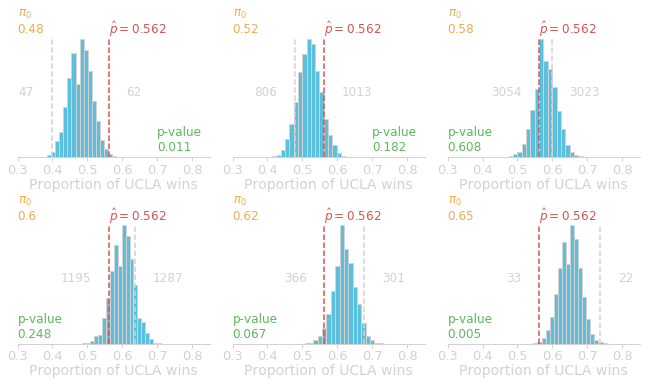

In [9]:
fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(ncols=3, nrows=2, figsize=(9, 6))

for it,(ax,null) in enumerate(zip([ax1, ax2, ax3, ax4, ax5, ax6],[0.48, 0.52, 0.58, 0.6, 0.62, 0.65])):
    n_simul = 10000
    n_games=249
    res = np.zeros(n_simul)
    for i in range(n_simul):
        sample = np.random.rand(n_games)
        res[i] = np.sum(sample<null)/n_games
    ax.hist(res, bins=20, edgecolor=colors["lightgray"], color=colors["blue"])
    ax.set_xlim(0.35, 0.85)
    ax.axvline(phat, ymax=0.95, color=colors["red"], ls="--")
    ax.text(phat, ax.get_ylim()[1], "$\hat{p}=0.562$", size=12, color=colors["red"], ha="left")
    ax.text(ax.get_xlim()[0]-0.05, ax.get_ylim()[1], "$\pi_0$\n{}".format(null), size=12, color=colors["orange"], ha="left")
    if it<2:
        n1 = np.sum(res>=phat)
        n2 = np.sum(res<=(null-(phat-null)))
        ax.text(phat+0.05, ax.get_ylim()[1]*0.5, "{}".format(n1), size=12, color=colors["lightgray"], ha="left")
        ax.text(null-(phat-null)-0.05, ax.get_ylim()[1]*0.5, "{}".format(n2), size=12, color=colors["lightgray"], ha="right")
        ax.axvline(null-(phat-null), ymin=0, ymax=0.95, color=colors["lightgray"], ls="--", clip_on=False)
        ax.text(ax.get_xlim()[1]-0.15, ax.get_ylim()[1]*0.05, "p-value\n{:.3f}".format((n1+n2)/n_simul), size=12, color=colors["green"], ha="left")
    else:
        n1 = np.sum(res<=phat)
        n2 = np.sum(res>=(null-(phat-null)))
        ax.text(phat-0.05, ax.get_ylim()[1]*0.5, "{}".format(n1), size=12, color=colors["lightgray"], ha="right")
        ax.text(null-(phat-null)+0.05, ax.get_ylim()[1]*0.5, "{}".format(n2), size=12, color=colors["lightgray"], ha="left")
        ax.axvline(null-(phat-null), ymin=0, ymax=0.95, color=colors["lightgray"], ls="--", clip_on=False)
        ax.text(ax.get_xlim()[0]-0.05, ax.get_ylim()[1]*0.05, "p-value\n{:.3f}".format((n1+n2)/n_simul), size=12, color=colors["green"], ha="left")

for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    for spine in ["bottom"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right", "left"]:
        ax.spines[spine].set_visible(False)
    ax.set_yticks([])
    ax.tick_params(axis="x", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=2)
    ax.set_xlabel("Proportion of UCLA wins", size=14, color=colors["lightgray"], labelpad=1)
    ax.set_xticks([0.3, 0.4, 0.5, 0.6, 0.7, 0.8])
    
#plt.tight_layout()
plt.subplots_adjust(left=0.02, bottom=0.17, right=0.98, top=0.89,
                wspace=0.12, hspace=0.5)

plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/ucla-usc-simulation-increasing-null.svg", transparent=True)

# Bootstrap confidence intervals

In [10]:
original_sample = np.zeros(ucla_wins+usc_wins)
original_sample[:ucla_wins] = 1

n_simul = 10000
boot_res = np.zeros(n_simul)

for i in range(n_simul):
    bootstrap_idx = np.random.randint(low=0, high=len(original_sample), size=len(original_sample))
    bootstrap_sample = original_sample[bootstrap_idx]
    boot_res[i]=np.sum(bootstrap_sample)/len(bootstrap_sample)

boot_ci95 = [np.percentile(boot_res, 2.5), np.percentile(boot_res, 97.5)]

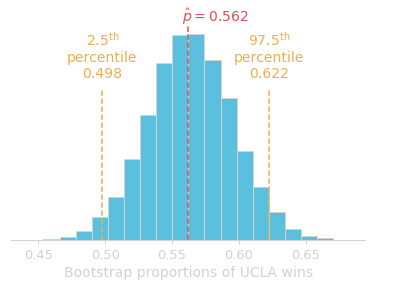

In [11]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.14, 0.15, 0.82, 0.75])
ax2 = ax1.twinx()
ax3 = ax1.twinx()
#ax4 = ax1.twinx()
#ax5 = ax1.twinx()

ax1.hist(boot_res, bins=20, edgecolor=colors["lightgray"], color=colors["blue"])

for spine in ["bottom"]:
    ax1.spines[spine].set_linewidth(1)
    ax1.spines[spine].set_color(colors["lightgray"])
for spine in ["top", "right", "left"]:
    ax1.spines[spine].set_visible(False)

for ax in [ax1]:
    ax.set_yticks([])
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_xlabel("Bootstrap proportions of UCLA wins", size=14, color=colors["lightgray"])

for ax in [ax2, ax3, ax4, ax5]:
    ax.set_ylim(ax1.get_ylim())
    ax.axis("off")

for ax in [ax2]:
    ax.axvline(phat, ymax=0.99, color=colors["red"], ls="--")
    ax.text(phat+0.02, ax.get_ylim()[1]*1.01, "$\hat{p}=0.562$", size=14, color=colors["red"], ha="center")

for ax in [ax3]:
    ax.axvline(boot_ci95[0], ymin=0, ymax=0.7, color=colors["orange"], ls="--", clip_on=False)
    ax.axvline(boot_ci95[1], ymin=0, ymax=0.7, color=colors["orange"], ls="--", clip_on=False)
    ax.text(boot_ci95[0], ax.get_ylim()[1]*0.75, "$2.5^{{\mathrm{{th}}}}$\npercentile\n{:.3f}".format(boot_ci95[0]), size=14, color=colors["orange"], ha="center")
    ax.text(boot_ci95[1], ax.get_ylim()[1]*0.75, "$97.5^{{\mathrm{{th}}}}$\npercentile\n{:.3f}".format(boot_ci95[1]), size=14, color=colors["orange"], ha="center")

plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/ucla-usc-bootstrap-ci95.svg", transparent=True)

# Bootstrap showcase

In [76]:
#Linear regression example
# This is a very simple example of using two scipy tools
# for linear regression, polyfit and stats.linregress

#Sample data creation
#number of points
n=50
t=np.linspace(-8, 8, n)
#parameters
a=-0.8; b=0
x=sp.polyval([a,b],t)
#add some noise
xn=x+np.random.randn(n)
xn=xn+np.random.randn(n)


#Linear regressison -polyfit - polyfit can be used other orders polys
(ar,br)=sp.polyfit(t,xn,1)
xr=sp.polyval([ar,br],t)

linreg_res = np.zeros((10000, 2))
for i in range(10000):
    k = np.random.randint(50, size=50)
    slope, intercept = sp.polyfit(t[k], xn[k], 1)
    linreg_res[i] = [slope, intercept]
    
xy = np.vstack([linreg_res[:, 0], linreg_res[:, 1]])
z = stats.gaussian_kde(xy)(xy)

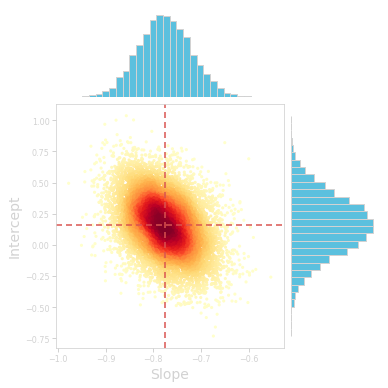

In [77]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

x = linreg_res[:, 0]
y = linreg_res[:, 1]

fig, axScatter = plt.subplots(figsize=(5.5, 5.5))

# the scatter plot:
axScatter.scatter(x, y, c=z, s=10, cmap=plt.get_cmap('YlOrRd'), edgecolor='')
axScatter.axvline(ar, ls='--', color=colors["red"], dashes=(3,2))
axScatter.axhline(br, ls='--', color=colors["red"], dashes=(3,2))


# create new axes on the right and on the top of the current axes
# The first argument of the new_vertical(new_horizontal) method is
# the height (width) of the axes to be created in inches.
divider = make_axes_locatable(axScatter)
axHistx = divider.append_axes("top", 1.2, pad=0.1, sharex=axScatter)
axHisty = divider.append_axes("right", 1.2, pad=0.1, sharey=axScatter)

axHistx.hist(x, bins=30, color=colors["blue"], edgecolor=colors["lightgray"])
axHisty.hist(y, bins=30, orientation='horizontal', color=colors["blue"], edgecolor=colors["lightgray"])

#Remove unecessary labels and ticks from top and bottom axis
for ax in [axHistx]:
    ax.tick_params(axis='x', bottom='off', top='off', labelbottom='off')
    ax.yaxis.set_ticks_position('left')
    ax.tick_params(axis='y', which='major', direction='out', width=1, length=4, color='k',
               labelsize=8, pad=2)
    ax.axis("off")
for ax in [axHisty]:
    ax.tick_params(axis='y', left='off', right='off', labelleft='off')
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='both', which='major', direction='out', width=1, length=4, color='k',
               labelsize=8, pad=2)
    for tick in ax.get_xticklabels():
        tick.set_rotation(60)
    ax.axis("off")

        
for ax in [axScatter]:
    for spine in ["top", "bottom", "left", "right"]:
        ax.spines[spine].set_color(colors["lightgray"])
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.tick_params(axis='both', which='major', direction='out', width=1, length=4, color=colors["lightgray"],
               labelsize=8, labelcolor=colors["lightgray"], pad=2)
    ax.set_xlabel('Slope', size=14, color=colors["lightgray"])
    ax.set_ylabel('Intercept', size=14, color=colors["lightgray"])

fig.tight_layout()

plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/bootstrap-showcase-regression-params.svg", transparent=True)

In [72]:
linreg_res = np.zeros((10000, 2))
linreg_lines1 = np.zeros((10000, t.size))
for i in range(10000):
    k = np.random.randint(50, size=50)
    slope, intercept = sp.polyfit(t[k], xn[k], 1)
    linreg_res[i] = [slope, intercept]
    linreg_lines1[i]=sp.polyval([slope,intercept],t)

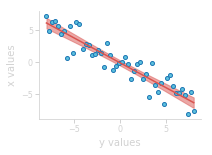

In [75]:
#matplotlib ploting
fig = plt.figure(figsize=(3, 2))
ax = fig.add_axes([0.2, 0.2, 0.75, 0.75])

ax.set_xlabel('y values', size=10, color=colors["lightgray"])
ax.set_ylabel('x values', size=10, color=colors["lightgray"])
for spine in ['top', 'right']:
    ax.spines[spine].set_color('none')
for spine in ['bottom', 'left']:
    ax.spines[spine].set_color(colors["lightgray"])
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='both', which='major', direction='out', width=1, length=4, color=colors["lightgray"],
               labelsize=8, labelcolor=colors["lightgray"], pad=2)

ax.plot(t, xn, 'o', ms=4, mfc=colors["blue"], mew=1, clip_on=False)
ax.plot(t, xr,'-', color=colors["red"])

#95% CI
ax.fill_between(t, np.sort(linreg_lines1, axis=0)[250, :], np.sort(linreg_lines1, axis=0)[9750, :], 
                color=colors["red"], edgecolor='None', alpha=0.5)


plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/bootstrap-showcase-regression-ci.svg", transparent=True)

# Police dog

In [87]:
n_simul = 10000

def boot_pval_prop(n, success, null=0.5, nsimul=10000, tail="one"):
    phat = success/n
    
    res = np.zeros(nsimul)
    for i in range(nsimul):
        simul = np.random.rand(n)
        if null>=0.5:
            res[i] = np.sum(simul>=null)
        else:
            res[i] = np.sum(simul<=null)
    
    if phat>=null:
        if tail=="one":
            pval = np.sum(res>=success)/nsimul
        if tail=="two":
            upper = np.sum(res>=success)
            lower = np.sum(res<=(null-(phat-null))*n)
            pval=(upper+lower)/nsimul
    else:
        if tail=="one":
            pval = np.sum(res<=success)/nsimul
        if tail=="two":
            lower = np.sum(res<=success)
            upper = np.sum(res>=(null+(null-phat))*n)
            pval=(lower+upper)/nsimul
    return pval

boot_pval_prop(21, 11, null=0.3, tail="two")


0.031099999999999999

In [88]:
11/21

0.5238095238095238

# Not normal example

Standard & Poor’s maintains one of the most widely followed indices of large-cap American stocks: the S&P 500. The index includes stocks of 500 companies in indus- tries in the US economy. A histogram of the daily volume (in millions of shares) for the S&P 500 stock index for every day in 2014 is shown

In [6]:
d1 = pd.read_csv("data-Lock5DataCSV/SandP500.csv")

(array([   6.,    8.,   69.,  106.,   36.,   19.,    4.,    2.,    1.,    1.]),
 array([  1286. ,   2219.2,   3152.4,   4085.6,   5018.8,   5952. ,
          6885.2,   7818.4,   8751.6,   9684.8,  10618. ]),
 <a list of 10 Patch objects>)

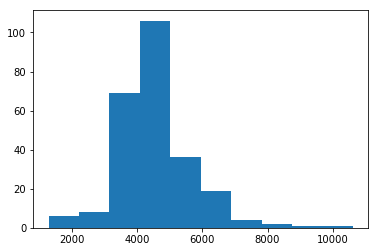

In [4]:
plt.hist(d1.Volume)

Over 900 movies came out of Hollywood between 2007 and 2013 and the dataset HollywoodMovies contains lots of information on these movies, such as studio, genre, budget, audience ratings, box office average opening weekend, world gross, and others.

In [7]:
d2 = pd.read_csv("data-Lock5DataCSV/HollywoodMovies2011.csv")

In [9]:
d2.head()

,Movie,LeadStudio,RottenTomatoes,AudienceScore,Story,Genre,TheatersOpenWeek,BOAverageOpenWeek,DomesticGross,ForeignGross,WorldGross,Budget,Profitability,OpeningWeekend
0,Insidious,Sony,67.0,65.0,Monster Force,Horror,2408.0,5511.0,54.01,43.00,97.009,1.5,64.672667,13.27
1,Paranormal Activity 3,Independent,68.0,58.0,Monster Force,Horror,3321.0,15829.0,103.66,98.24,201.897,5.0,40.379400,52.57
2,Bad Teacher,Independent,44.0,38.0,Comedy,Comedy,3049.0,10365.0,100.29,115.90,216.196,20.0,10.809800,31.60
3,Harry Potter and the Deathly Hallows Part 2,Warner Bros,96.0,92.0,Rivalry,Fantasy,4375.0,38672.0,381.01,947.10,1328.111,125.0,10.624888,169.19
4,Bridesmaids,Relativity Media,90.0,77.0,Rivalry,Comedy,2918.0,8995.0,169.11,119.28,288.382,32.5,8.873292,26.25


(array([  4.,   7.,  12.,  18.,  21.,  16.,  16.,  15.,  16.,  10.]),
 array([ 24. ,  30.9,  37.8,  44.7,  51.6,  58.5,  65.4,  72.3,  79.2,
         86.1,  93. ]),
 <a list of 10 Patch objects>)

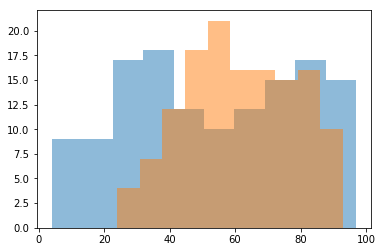

In [14]:
plt.hist(d2.RottenTomatoes.dropna(), alpha=0.5)
plt.hist(d2.AudienceScore.dropna(), alpha=0.5)

(array([ 45.,  46.,  13.,   8.,   7.,   9.,   2.,   3.,   0.,   1.]),
 array([  2.00000000e-01,   2.51800000e+01,   5.01600000e+01,
          7.51400000e+01,   1.00120000e+02,   1.25100000e+02,
          1.50080000e+02,   1.75060000e+02,   2.00040000e+02,
          2.25020000e+02,   2.50000000e+02]),
 <a list of 10 Patch objects>)

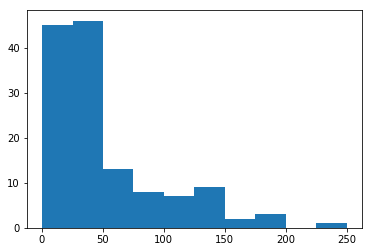

In [16]:
plt.hist(d2.Budget.dropna())

As of this writing, there are 215 countries listed by the World Bank.3 A great deal of information about these countries (such as energy use, birth rate, life expectancy) is in the full dataset under the name AllCountries

In [17]:
d3 = pd.read_csv("data-Lock5DataCSV/AllCountries.csv")

In [18]:
d3.head()

,Country,Code,LandArea,Population,Energy,Rural,Military,Health,HIV,Internet,Developed,BirthRate,ElderlyPop,LifeExpectancy,CO2,GDP,Cell,Electricity
0,Afghanistan,AFG,652230,29.021,NaN,76.0,4.4,3.7,NaN,1.7,NaN,46.5,2.2,43.9,0.025035,501.470945,37.807108,NaN
1,Albania,ALB,27400,3.143,2088.0,53.3,NaN,8.2,NaN,23.9,1.0,14.6,9.3,76.6,1.312855,3678.231748,141.928961,1747.098010
2,Algeria,ALG,2381740,34.373,37069.0,34.8,13.0,10.6,0.1,10.2,1.0,20.8,4.6,72.4,3.232960,4494.886728,92.421261,970.982457
3,American Samoa,ASA,200,0.066,NaN,7.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,470,0.084,NaN,11.1,NaN,21.3,NaN,70.5,NaN,10.4,NaN,NaN,6.527835,NaN,77.176423,NaN


(array([ 68.,  22.,  23.,  20.,  14.,   8.,  13.,  14.,  11.,   6.]),
 array([  0.2 ,   9.23,  18.26,  27.29,  36.32,  45.35,  54.38,  63.41,
         72.44,  81.47,  90.5 ]),
 <a list of 10 Patch objects>)

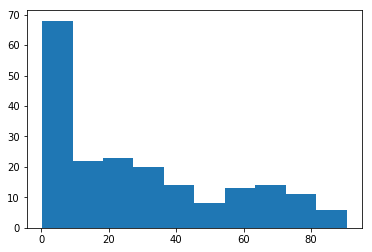

In [21]:
plt.hist(d3.Internet.dropna())

In [11]:
np.random.randint(0, 2, size=10)

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0])

In [63]:
np.array([1,23,19,24,17,26,20,23,89,82])[1:-2]

array([23, 19, 24, 17, 26, 20, 23])

In [62]:
np.array([1,23,19,24,17,26,20,23,89,82])[1:-2].mean()

21.714285714285715

In [15]:
a = ["{:.2f}".format(x) for x in data.Budget.dropna().values]

In [18]:
b = [float(i) for i in a]

pvalue = 0.0289
